#Final Project

##Question 1

###References

https://viblo.asia/p/optimizer-hieu-sau-ve-cac-thuat-toan-toi-uu-gdsgdadam-Qbq5QQ9E5D8

https://www.analyticsvidhya.com/blog/2021/10/a-comprehensive-guide-on-deep-learning-optimizers/#Mini_Batch_Gradient_Descent_Deep_Learning_Optimizer

###About dataset

* Number of samples: The MNIST set includes 60,000 training images and 10,000 testing images.

* Image size: Each image is 28x28 pixels, grayscale.

* Handwritten numbers: The images in MNIST are handwritten numbers from 0 to 9.

* Each image is a number handwritten by many different people, so there will be variations in writing style.

###Import libraries

In [ ]:
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
import time
import pandas as pd
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad

###Data preprocessing

####A program with a data set(MNIST)

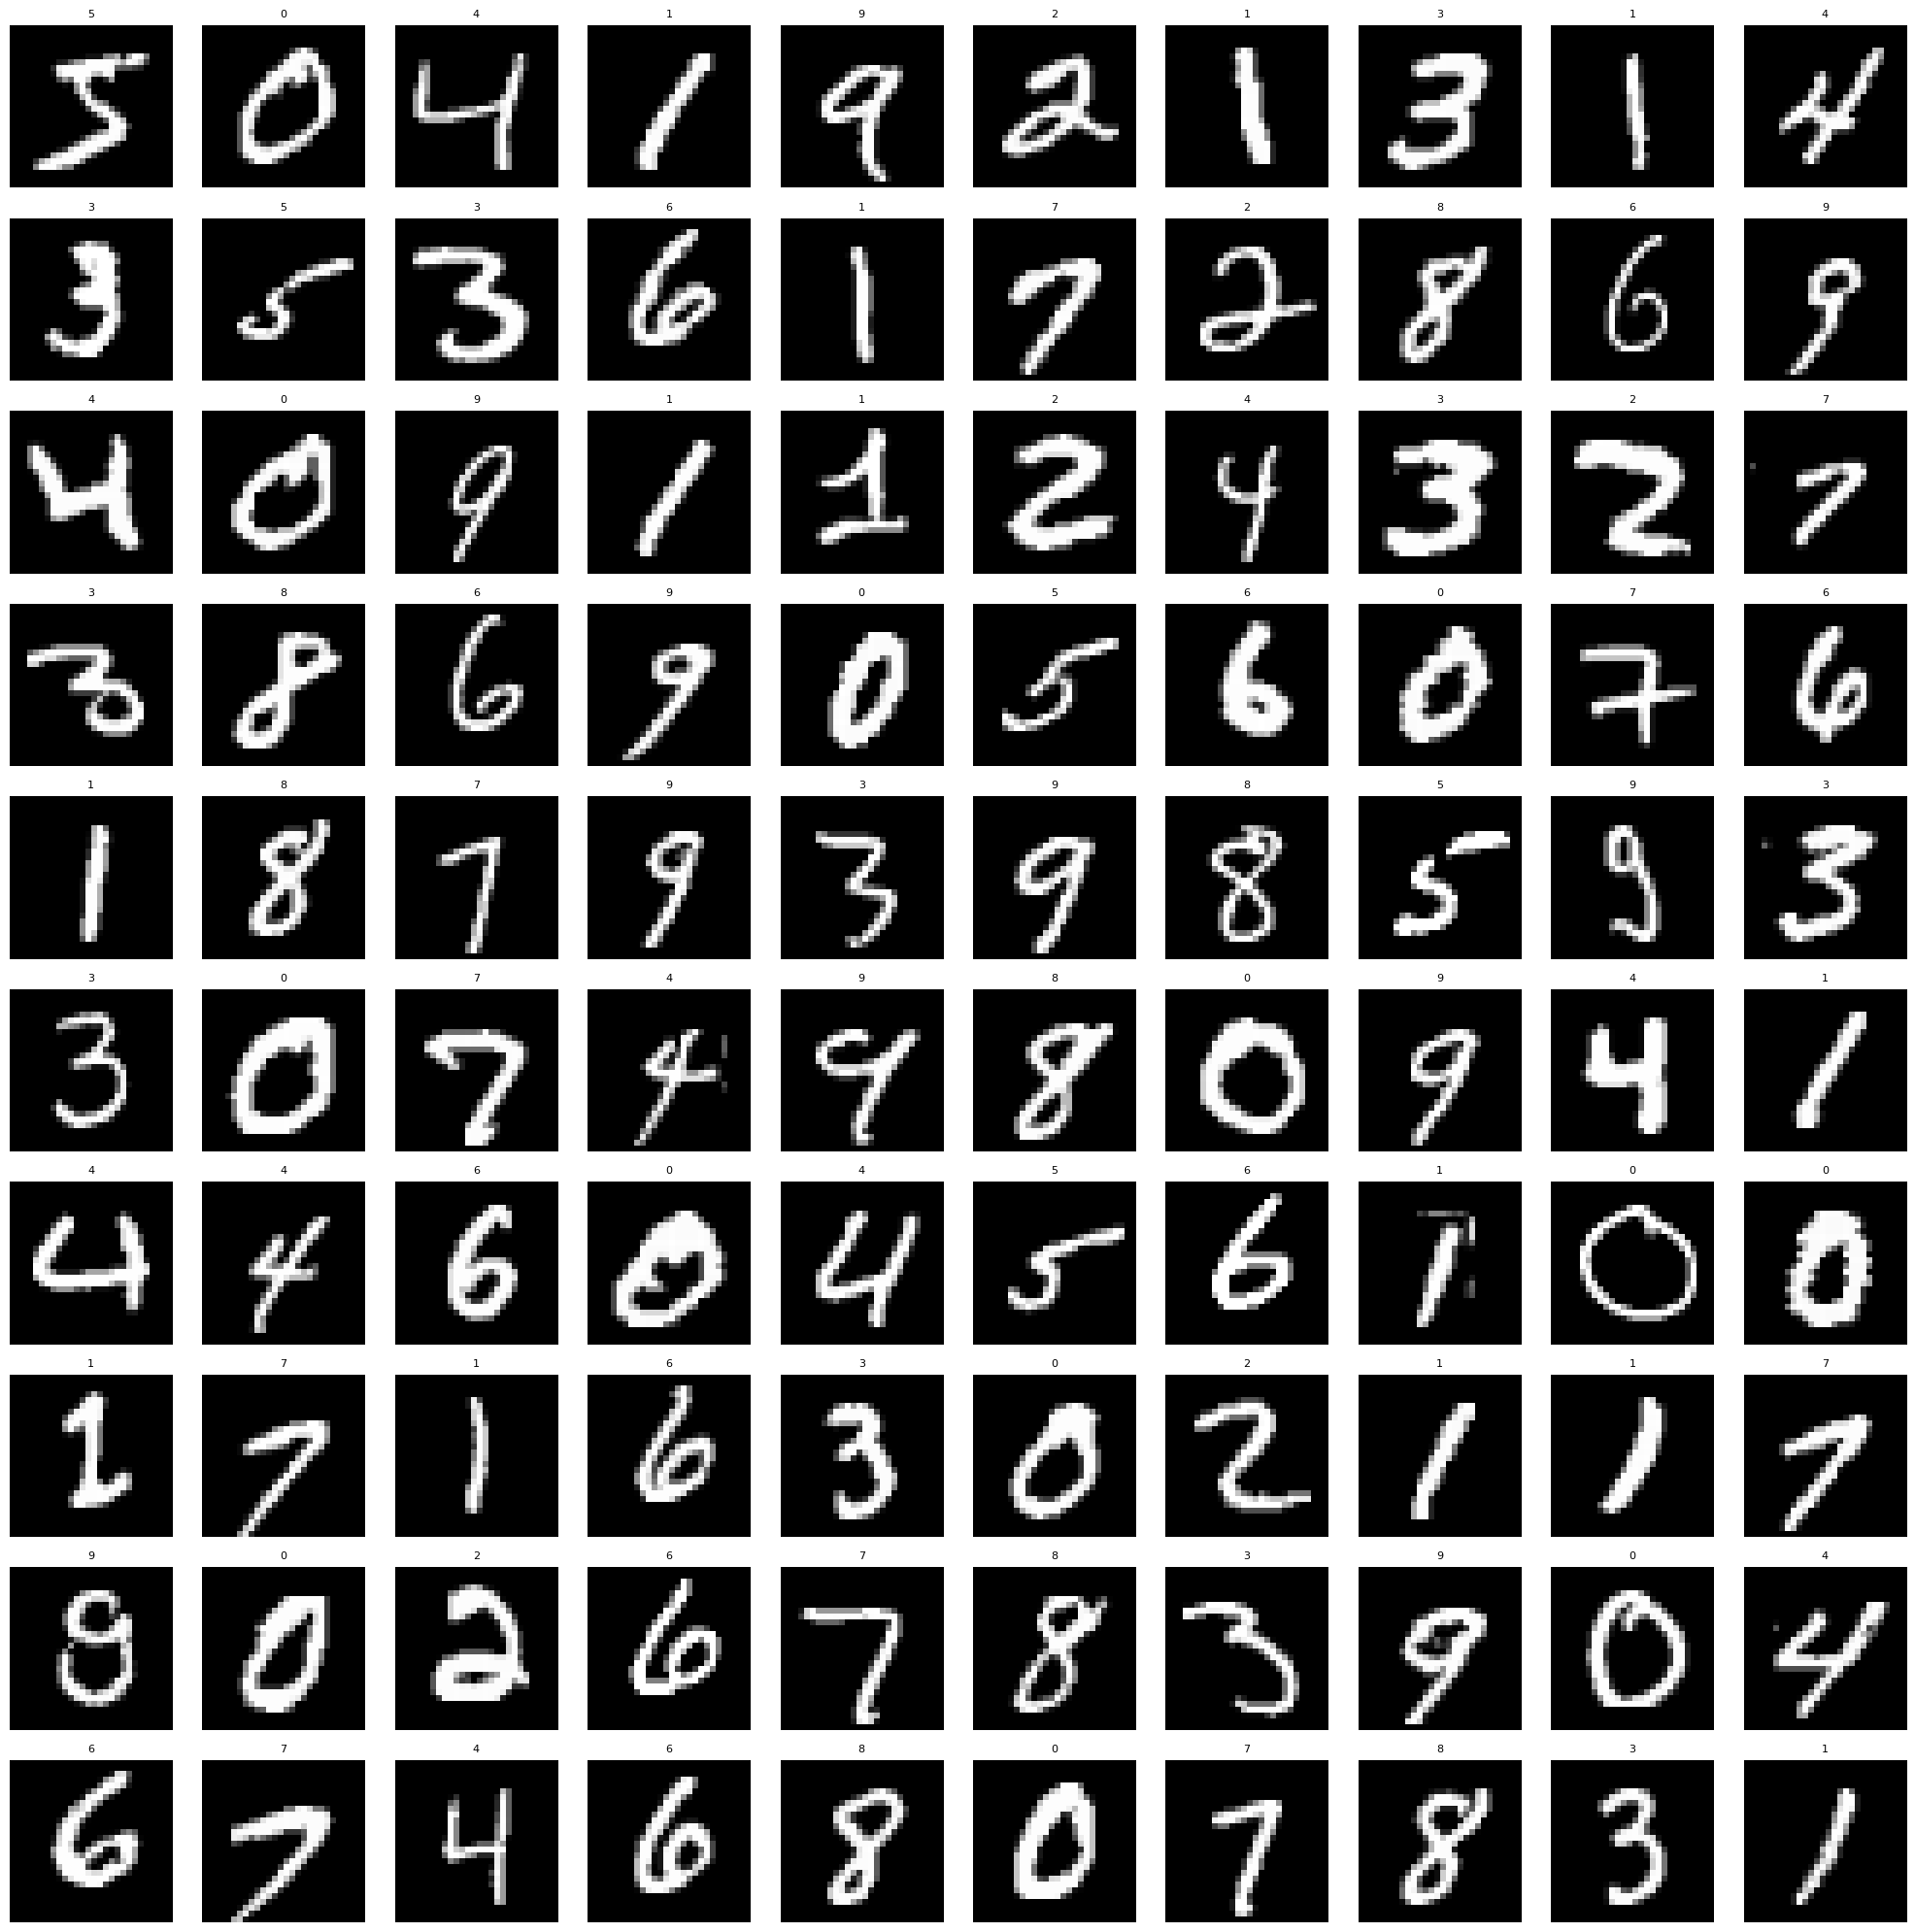

In [ ]:
# Tải dữ liệu MNIST
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
data, target = mnist.data, mnist.target

# Chuyển đổi ảnh thành ma trận 28x28
images = data.reshape(-1, 28, 28)
labels = target.astype(int)

# Hiển thị 100 ảnh đầu tiên
plt.figure(figsize=(20, 20))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(images[i], cmap='gray')
    plt.title(f"{labels[i]}", fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()


####Split train and test but use 10% for dataset

In [ ]:

# Tải dữ liệu MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()



small_train_size = int(0.1 * len(x_train))
small_test_size = int(0.1 * len(x_test))

x_train = x_train[:small_train_size]
y_train = y_train[:small_train_size]

x_test = x_test[:small_test_size]
y_test = y_test[:small_test_size]

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(6000, 28, 28) (6000,)
(1000, 28, 28) (1000,)


####Convert test and train into image

In [ ]:
x_train= x_train.reshape(x_train.shape[0],28,28,1)
x_test=  x_test.reshape(x_test.shape[0],28,28,1)
input_shape=(28,28,1)
y_train=keras.utils.to_categorical(y_train)#,num_classes=)
y_test=keras.utils.to_categorical(y_test)#, num_classes)
x_train= x_train.astype('float32')
x_test= x_test.astype('float32')
x_train /= 255
x_test /=255

In [ ]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((6000, 28, 28, 1), (6000, 10), (1000, 28, 28, 1), (1000, 10))

###Processing

####Build model

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback

class LearningRateLogger(Callback):
    def __init__(self):
        self.learning_rates = []

    def on_epoch_end(self, epoch, logs=None):
        current_lr = float(tf.keras.backend.get_value(self.model.optimizer.learning_rate))
        self.learning_rates.append(current_lr)
        print(f"Epoch {epoch + 1}, Learning rate: {current_lr}")



In [ ]:

num_classes=10

epochs=10

def build_model(optimizer):

  model=Sequential()

  model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))

  model.add(MaxPooling2D(pool_size=(2,2)))

  model.add(Dropout(0.25))

  model.add(Flatten())

  model.add(Dense(256, activation='relu'))

  model.add(Dropout(0.5))

  model.add(Dense(num_classes, activation='softmax'))

  model.compile(loss=keras.losses.categorical_crossentropy, optimizer= optimizer, metrics=['accuracy'])

  return model

####Use optimizers method:

*    Gradient Descent (GD): Batch Gradient Descent(BGD); Stochastic Gradient Descent (SGD); Mini-Batch Gradient Descent(Mini-Batch)

*    Momentum

*    Adagrad (Adaptive Gradient Algorithm)

*    RMSProp (Root Mean Square Propagation)

*    Adam (Adaptive Moment Estimation)

In [ ]:
optimizers = ['SGD', 'Adam', 'RMSprop', 'Adagrad', 'Momentum', 'Mini-Batch','BGD']
results = {}

for optimizer_name in optimizers:
    # Đo thời gian bắt đầu
    if optimizer_name == 'SGD':
        optimizer = SGD()
        batch_size=1
    elif optimizer_name == 'Adam':
        optimizer = Adam()
        batch_size=64
    elif optimizer_name == 'RMSprop':
        optimizer = RMSprop()
        batch_size=64
    elif optimizer_name == 'Adagrad':
        optimizer = Adagrad()
        batch_size=64
    elif optimizer_name == 'Momentum':
        optimizer = SGD(momentum=0.9)
        batch_size=64
    elif optimizer_name == 'Mini-Batch':
        optimizer = SGD()
        batch_size=64
    elif optimizer_name == 'BGD':
        optimizer = SGD()
        batch_size=x_train.shape[0]
    else:
        raise ValueError(f"Optimizer {optimizer_name} not recognized.")

    # Xây dựng và huấn luyện mô hình
    model = build_model(optimizer)

    start_time = time.time()
    # Đính kèm callback khi huấn luyện
    lr_logger = LearningRateLogger()

    hist = model.fit(x_train, y_train, epochs=epochs, batch_size=batch_size,
                    validation_data=(x_test, y_test), verbose=1, callbacks=[lr_logger])
    end_time = time.time() # Tính tổng thời gian
    total_time = end_time - start_time #
    # Lưu kết quả vào dictionary
    results[optimizer_name] = {
        'Epoch 1 Val Accuracy': hist.history['val_accuracy'][0],
        'Epoch 1 Val Loss': hist.history['val_loss'][0],
        'Epoch 5 Val Accuracy': hist.history['val_accuracy'][4] if len(hist.history['val_accuracy']) > 4 else None,
        'Epoch 5 Val Loss': hist.history['val_loss'][4] if len(hist.history['val_loss']) > 4 else None,
        'Epoch 10 Val Accuracy': hist.history['val_accuracy'][9] if len(hist.history['val_accuracy']) > 9 else None,
        'Epoch 10 Val Loss': hist.history['val_loss'][9] if len(hist.history['val_loss']) > 9 else None,
        'Total Time': total_time/60,# Lưu tổng thời gian
        'Epochs': list(range(1, len(hist.history['accuracy']) + 1)),
        'Accuracy': hist.history['accuracy'],
        'Loss': hist.history['loss'],
        'Val Accuracy': hist.history['val_accuracy'],
        'Val Loss': hist.history['val_loss'],
        'Learning Rates': lr_logger.learning_rates,  # Lưu Learning Rates
        'Batch Size': batch_size,  # Ví dụ, batch size của training
        'Optimizer Parameters': optimizer.get_config(),  # Cấu hình của optimizer
        'Final Epoch Accuracy': hist.history['accuracy'][-1],  # Accuracy cuối cùng
        'Final Epoch Val Accuracy': hist.history['val_accuracy'][-1],  # Val Accuracy cuối cùng
        'Final Epoch Loss': hist.history['loss'][-1],  # Loss cuối cùng
        'Final Epoch Val Loss': hist.history['val_loss'][-1]

    }



Epoch 1/10
5996/6000 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6819 - loss: 0.9671Epoch 1, Learning rate: 0.009999999776482582
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 53s 9ms/step - accuracy: 0.6820 - loss: 0.9668 - val_accuracy: 0.9230 - val_loss: 0.2638
Epoch 2/10
5997/6000 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9162 - loss: 0.2771Epoch 2, Learning rate: 0.009999999776482582
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 76s 8ms/step - accuracy: 0.9162 - loss: 0.2770 - val_accuracy: 0.9530 - val_loss: 0.1605
Epoch 3/10
5992/6000 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9487 - loss: 0.1645Epoch 3, Learning rate: 0.009999999776482582
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 35s 6ms/step - accuracy: 0.9487 - loss: 0.1645 - val_accuracy: 0.9560 - val_loss: 0.1314
Epoch 4/10
5995/6000 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9528 - loss: 0.1432Epoch 4, Learning rate: 0.009999999776482582
6000/6000 ━━━━━━━━━━━━━━━━━━━━ 36s 6ms/step - accuracy: 0.9528 - loss: 0.1432 - val_accuracy: 0.9650 - val_loss:

In [ ]:
model.summary()


Model: "sequential_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_14 (Conv2D)                   │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_14 (MaxPooling2D)      │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_28 (Dropout)                 │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_14 (Flatten)                 │ (None, 5408)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_28 (Dense)                     │ (None, 256)                 │       1,384,704 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_29 (Dropout)                 │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_29 (Dense)                     │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,387,596 (5.29 MB)

 Trainable params: 1,387,594 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

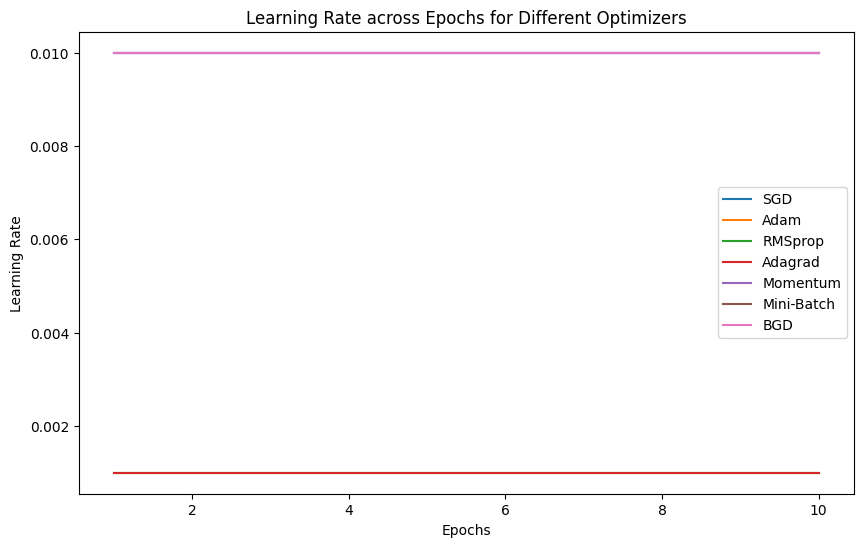

In [ ]:
plt.figure(figsize=(10, 6))

for optimizer_name in results.keys():
    learning_rates =results[optimizer_name]['Learning Rates']
    plt.plot(range(1, len(learning_rates) + 1), learning_rates, label=f'{optimizer_name}')

plt.title("Learning Rate across Epochs for Different Optimizers")
plt.xlabel("Epochs")
plt.ylabel("Learning Rate")
plt.legend()
plt.show()


###Visualization and show result

####Table with compare accuracy use by different methods

In [ ]:
df_results = pd.DataFrame(results).T

df_results




,Epoch 1 Val Accuracy,Epoch 1 Val Loss,Epoch 5 Val Accuracy,Epoch 5 Val Loss,Epoch 10 Val Accuracy,Epoch 10 Val Loss,Total Time,Epochs,Accuracy,Loss,Val Accuracy,Val Loss
SGD,0.907,0.275061,0.965,0.108197,0.97,0.106938,6.732178,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.8238333463668823, 0.9276666641235352, 0.947...","[0.5698394179344177, 0.23057517409324646, 0.16...","[0.9070000052452087, 0.9480000138282776, 0.961...","[0.27506059408187866, 0.157022625207901, 0.130..."
Adam,0.9,0.303562,0.958,0.124464,0.969,0.097648,0.83905,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.7885000109672546, 0.922166645526886, 0.9541...","[0.6844025254249573, 0.26419275999069214, 0.16...","[0.8999999761581421, 0.9350000023841858, 0.947...","[0.3035622835159302, 0.210881769657135, 0.1618..."
RMSprop,0.885,0.3636,0.954,0.135688,0.969,0.10326,0.805831,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.7894999980926514, 0.9045000076293945, 0.939...","[0.6737236976623535, 0.31398022174835205, 0.21...","[0.8849999904632568, 0.9229999780654907, 0.940...","[0.3635997474193573, 0.24432040750980377, 0.18..."
Adagrad,0.411,2.202518,0.709,1.518806,0.804,0.878187,1.000853,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.17033334076404572, 0.33116665482521057, 0.4...","[2.267476797103882, 2.156142234802246, 2.01335...","[0.41100001335144043, 0.6029999852180481, 0.67...","[2.2025177478790283, 2.078261137008667, 1.9146..."
Momentum,0.87,0.437612,0.93,0.218036,0.951,0.145705,1.010053,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6666666865348816, 0.862500011920929, 0.8948...","[1.0545183420181274, 0.44464167952537537, 0.34...","[0.8700000047683716, 0.8960000276565552, 0.907...","[0.4376121759414673, 0.3454735577106476, 0.284..."
Mini-Batch,0.669,1.690451,0.867,0.465009,0.893,0.356326,0.739724,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.3556666672229767, 0.6518333554267883, 0.760...","[2.0671207904815674, 1.2966724634170532, 0.812...","[0.6690000295639038, 0.7839999794960022, 0.837...","[1.690450668334961, 0.8734176754951477, 0.6188..."
BGD,0.102,2.300061,0.132,2.285614,0.21,2.268277,1.4555,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.10249999910593033, 0.10050000250339508, 0.1...","[2.3202555179595947, 2.316403388977051, 2.3137...","[0.10199999809265137, 0.10499999672174454, 0.1...","[2.300060987472534, 2.296400308609009, 2.29276..."


In [ ]:
# Sắp xếp df_results theo cột 'acc' giảm dần
df_results_sorted = df_results.sort_values(by='Val Accuracy', ascending=False)

# In kết quả sau khi sắp xếp
df_results_sorted


,Epoch 1 Val Accuracy,Epoch 1 Val Loss,Epoch 5 Val Accuracy,Epoch 5 Val Loss,Epoch 10 Val Accuracy,Epoch 10 Val Loss,Total Time,Epochs,Accuracy,Loss,Val Accuracy,Val Loss
SGD,0.907,0.275061,0.965,0.108197,0.97,0.106938,6.732178,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.8238333463668823, 0.9276666641235352, 0.947...","[0.5698394179344177, 0.23057517409324646, 0.16...","[0.9070000052452087, 0.9480000138282776, 0.961...","[0.27506059408187866, 0.157022625207901, 0.130..."
Adam,0.9,0.303562,0.958,0.124464,0.969,0.097648,0.83905,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.7885000109672546, 0.922166645526886, 0.9541...","[0.6844025254249573, 0.26419275999069214, 0.16...","[0.8999999761581421, 0.9350000023841858, 0.947...","[0.3035622835159302, 0.210881769657135, 0.1618..."
RMSprop,0.885,0.3636,0.954,0.135688,0.969,0.10326,0.805831,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.7894999980926514, 0.9045000076293945, 0.939...","[0.6737236976623535, 0.31398022174835205, 0.21...","[0.8849999904632568, 0.9229999780654907, 0.940...","[0.3635997474193573, 0.24432040750980377, 0.18..."
Momentum,0.87,0.437612,0.93,0.218036,0.951,0.145705,1.010053,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.6666666865348816, 0.862500011920929, 0.8948...","[1.0545183420181274, 0.44464167952537537, 0.34...","[0.8700000047683716, 0.8960000276565552, 0.907...","[0.4376121759414673, 0.3454735577106476, 0.284..."
Mini-Batch,0.669,1.690451,0.867,0.465009,0.893,0.356326,0.739724,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.3556666672229767, 0.6518333554267883, 0.760...","[2.0671207904815674, 1.2966724634170532, 0.812...","[0.6690000295639038, 0.7839999794960022, 0.837...","[1.690450668334961, 0.8734176754951477, 0.6188..."
Adagrad,0.411,2.202518,0.709,1.518806,0.804,0.878187,1.000853,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.17033334076404572, 0.33116665482521057, 0.4...","[2.267476797103882, 2.156142234802246, 2.01335...","[0.41100001335144043, 0.6029999852180481, 0.67...","[2.2025177478790283, 2.078261137008667, 1.9146..."
BGD,0.102,2.300061,0.132,2.285614,0.21,2.268277,1.4555,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]","[0.10249999910593033, 0.10050000250339508, 0.1...","[2.3202555179595947, 2.316403388977051, 2.3137...","[0.10199999809265137, 0.10499999672174454, 0.1...","[2.300060987472534, 2.296400308609009, 2.29276..."


####Plot Compare Accuracy

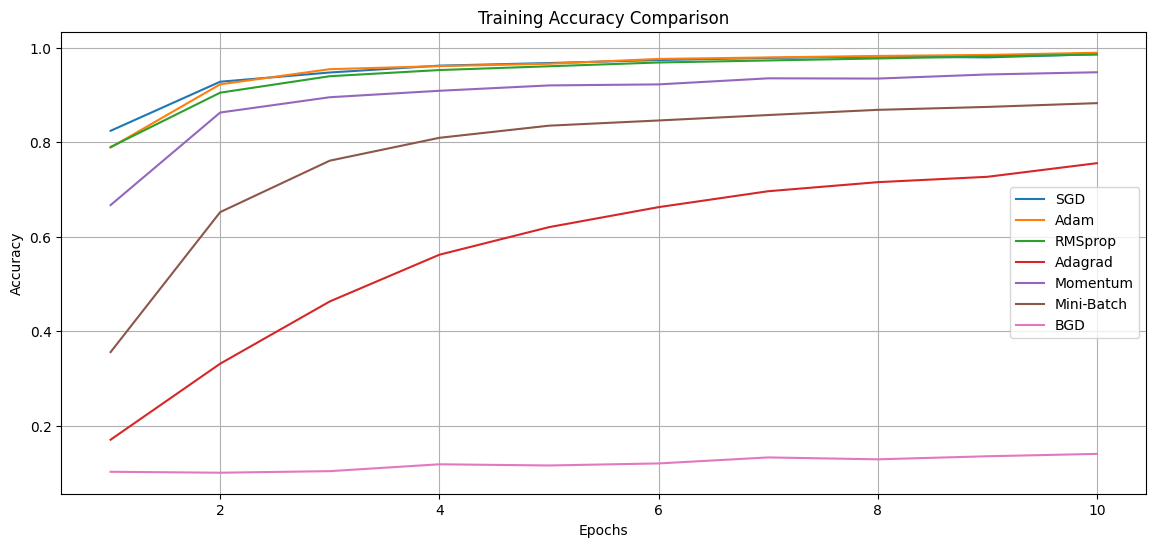

In [ ]:
plt.figure(figsize=(14, 6))
for opt in results.keys():
    epochs = results[opt]['Epochs']
    plt.plot(epochs, results[opt]['Accuracy'], label=f'{opt}')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()



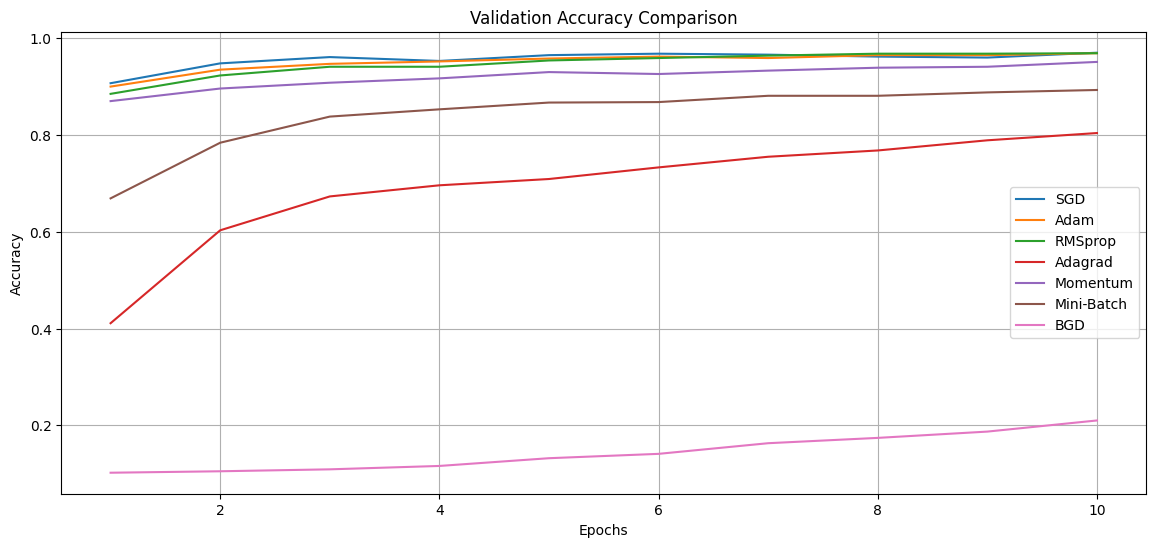

In [ ]:
plt.figure(figsize=(14, 6))

# Accuracy plot: Training vs Validation
# Ví dụ vẽ đồ thị
for opt in results.keys():
    epochs = results[opt]['Epochs']

    plt.plot(epochs, results[opt]['Val Accuracy'], label=f'{opt}')

plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Validation Accuracy Comparison')
plt.legend()
plt.grid(True)
plt.show()


####Plot compare loss

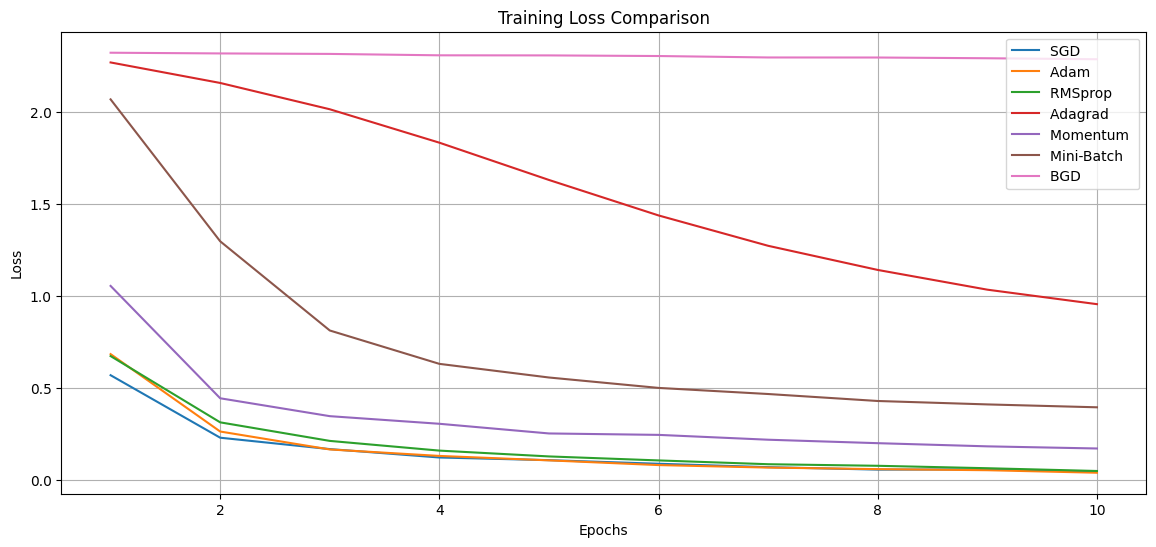

In [ ]:
plt.figure(figsize=(14, 6))

for opt in results.keys():
    epochs = results[opt]['Epochs']
    plt.plot(epochs, results[opt]['Loss'], label=f'{opt} ')
plt.title('Training Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

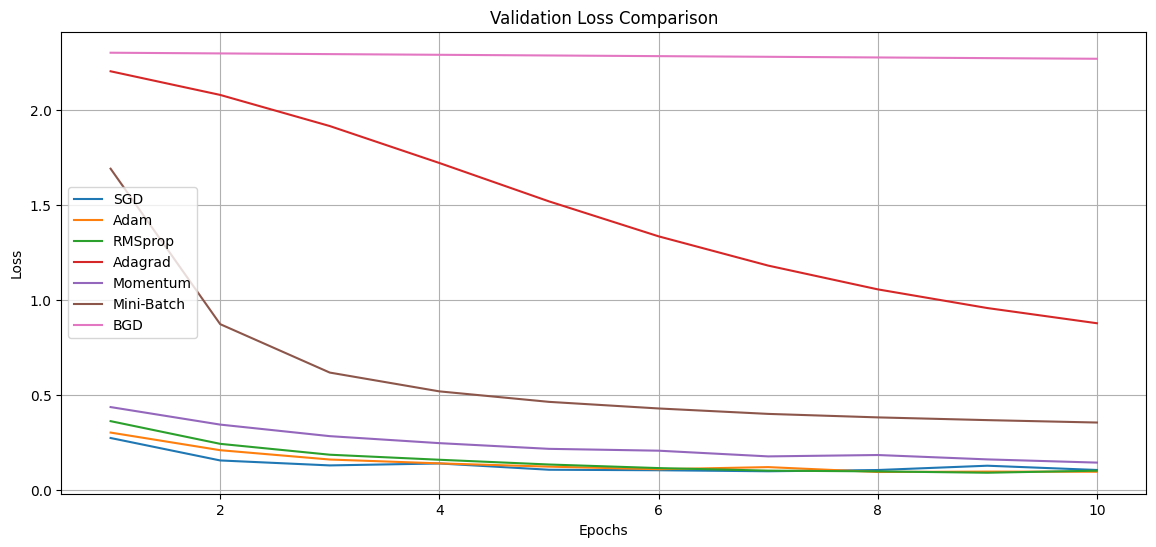

In [ ]:
plt.figure(figsize=(14, 6))

for opt in results.keys():
    epochs = results[opt]['Epochs']
    plt.plot(epochs, results[opt]['Val Loss'], label=f'{opt}')
plt.title('Validation Loss Comparison')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()


##Question 2

### import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.callbacks import EarlyStopping
from keras.layers import LSTM, Dropout
from keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.impute import SimpleImputer

### Data process

In [2]:
# Thiết lập phong cách cho biểu đồ
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")

# Đường dẫn đến file dữ liệu
input_file = "market_stocks_new.csv"

# Đọc dữ liệu từ file CSV
try:
    df = pd.read_csv(input_file, index_col=0, parse_dates=True)
    print(f"Dữ liệu đã được đọc từ file: {input_file}")
except FileNotFoundError:
    print(f"File {input_file} không tồn tại. Vui lòng kiểm tra lại đường dẫn.")
    exit()

# Hiển thị 10 dòng cuối của dữ liệu
print(df.tail(10))

Dữ liệu đã được đọc từ file: market_stocks_new.csv
            Adj Close      Close       High        Low       Open   Volume  \
Date                                                                         
2023-12-15  48.876141  48.889999  49.403999  48.119999  48.194000  2376807   
2023-12-18  50.062805  50.077000  50.432999  49.150002  49.400002  2376807   
2023-12-19  49.589939  49.604000  49.700001  48.895000  49.424000  2376807   
2023-12-20  48.097359  48.111000  49.999001  48.098000  49.654999  2376807   
2023-12-21  48.976116  48.990002  49.095001  48.418999  48.811001  2376807   
2023-12-22  48.816162  48.830002  49.382999  48.466999  49.195000  2376807   
2023-12-26  49.265030  49.278999  49.599998  48.959999  48.967999  2376807   
2023-12-27  49.402992  49.417000  49.680000  49.084999  49.511002  2376807   
2023-12-28  49.507965  49.521999  49.883999  49.411999  49.643002  2376807   
2023-12-29  49.507965  49.521999  49.997002  48.750999  49.813000  2376807   

            

In [3]:
# Kiểm tra và xử lý cột industry_type
if 'industry_type' not in df.columns:
    print("Dữ liệu không chứa cột 'industry_type'. Vui lòng kiểm tra lại.")
else:
    print("Unique values in 'industry_type' before encoding:", df['industry_type'].unique())
    label_encoder = LabelEncoder()
    df['industry_type'] = label_encoder.fit_transform(df['industry_type'])

Unique values in 'industry_type' before encoding: ['TECH' 'MANUFACTURE' 'ENTERTAINTMENT']


In [5]:
# Chuẩn hóa dữ liệu industry_type
scaler = MinMaxScaler()
df['industry_type_scaled'] = scaler.fit_transform(df[['industry_type']])
print("Unique values in 'industry_type' after encoding:", df['industry_type'].unique())
print("Unique values in 'industry_type_scaled' after encoding:", df['industry_type_scaled'].unique())

Unique values in 'industry_type' after encoding: [2 1 0]
Unique values in 'industry_type_scaled' after encoding: [1.  0.5 0. ]


In [6]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 3012 entries, 2021-01-04 to 2023-12-29
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Adj Close             3012 non-null   float64
 1   Close                 3012 non-null   float64
 2   High                  3012 non-null   float64
 3   Low                   3012 non-null   float64
 4   Open                  3012 non-null   float64
 5   Volume                3012 non-null   int64  
 6   GDP                   3012 non-null   float64
 7   CPI                   3012 non-null   float64
 8   industry_type         3012 non-null   int64  
 9   Company               3012 non-null   object 
 10  industry_type_scaled  3012 non-null   float64
dtypes: float64(8), int64(2), object(1)
memory usage: 282.4+ KB


,Adj Close,Close,High,Low,Open,Volume,GDP,CPI,industry_type,industry_type_scaled
count,3012.000000,3012.000000,3012.000000,3012.000000,3012.000000,3.012000e+03,3.012000e+03,3.012000e+03,3012.000000,3012.000000
mean,129.067002,129.708046,131.691082,127.725622,129.733528,7.956747e+06,5.140123e+05,1.255493e+08,1.000000,0.500000
std,176.378299,176.082653,178.474375,173.778797,176.208436,1.393318e+07,8.930030e+05,2.116942e+08,0.707224,0.353612
min,11.215970,11.227000,11.735000,10.813000,10.971000,1.825070e+05,2.625180e+02,2.625180e+02,0.000000,0.000000
25%,28.028666,28.477499,28.950001,27.967500,28.397500,2.275118e+06,2.808080e+02,9.654772e+05,0.750000,0.375000
50%,43.417858,43.825001,44.549999,43.247999,43.915001,2.312426e+06,2.988120e+02,1.767620e+07,1.000000,0.500000
75%,89.052498,92.787500,94.382498,90.650000,92.139999,3.082705e+06,4.480198e+05,1.463178e+08,1.250000,0.625000
max,691.690002,691.690002,700.989990,686.090027,692.349976,3.642318e+08,2.267529e+06,1.543911e+09,2.000000,1.000000


In [7]:
# Tạo DataFrame riêng cho từng công ty với xử lý NaN
company_dataframes = {}
for company in df['Company'].unique():
    temp_df = df[df['Company'] == company].copy()

    # Xử lý NaN cho từng DataFrame công ty
    numeric_columns = temp_df.select_dtypes(include=['number']).columns
    non_numeric_columns = temp_df.select_dtypes(exclude=['number']).columns

    imputer = SimpleImputer(strategy='mean')
    temp_df[numeric_columns] = imputer.fit_transform(temp_df[numeric_columns])
    temp_df[non_numeric_columns] = temp_df[non_numeric_columns].fillna('Unknown')

    # Lọc cột liên quan
    temp_df = temp_df[['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume', 'industry_type', 'industry_type_scaled']]
    company_dataframes[company] = temp_df


# Hiển thị thông tin cơ bản của mỗi công ty
for company, company_df in company_dataframes.items():
    print(f"{company}: {company_df.shape[0]} rows")
    print(f"Sample data from {company}:")
    print(company_df.head())

UBER: 753 rows
Sample data from UBER:
            Adj Close      Close       High        Low       Open      Volume  \
Date                                                                            
2021-01-04  51.139999  51.139999  52.320000  49.634998  52.220001  17291800.0   
2021-01-05  54.009998  54.009998  54.189999  50.759998  51.000000  21403200.0   
2021-01-06  52.480000  52.480000  54.070000  52.000000  53.310001  17738100.0   
2021-01-07  56.130001  56.130001  56.250000  53.200001  53.369999  23737500.0   
2021-01-08  53.279999  53.279999  54.790001  52.580002  54.395000  37999400.0   

            industry_type  industry_type_scaled  
Date                                             
2021-01-04            2.0                   1.0  
2021-01-05            2.0                   1.0  
2021-01-06            2.0                   1.0  
2021-01-07            2.0                   1.0  
2021-01-08            2.0                   1.0  
INTEL: 753 rows
Sample data from INTEL:
    

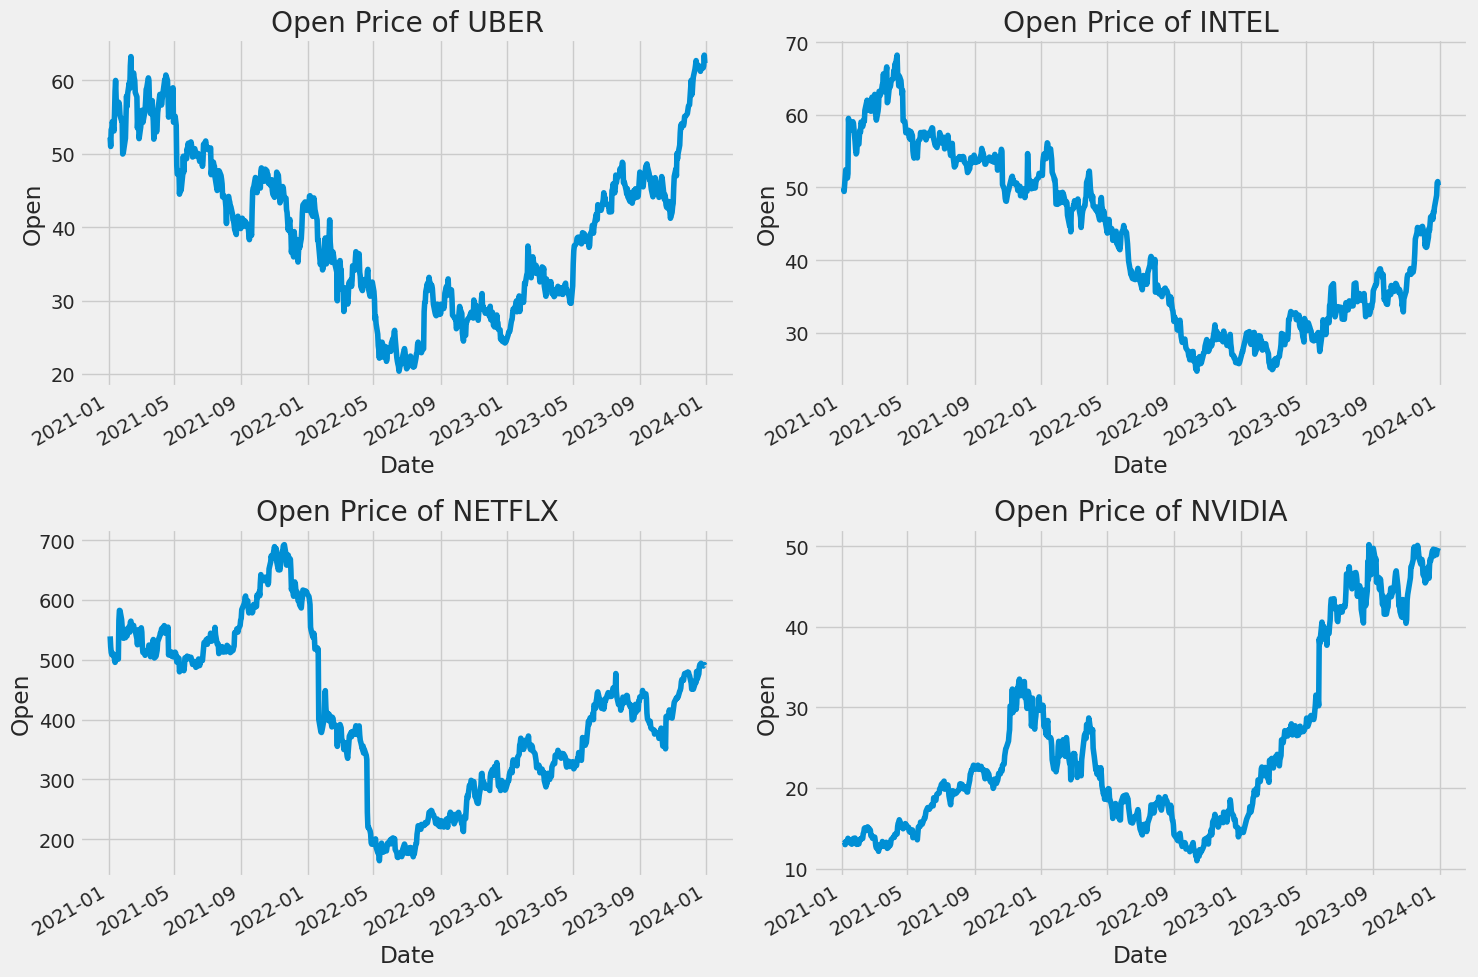

In [8]:
# Vẽ biểu đồ giá mở cửa của từng công ty
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

for i, (company, df) in enumerate(company_dataframes.items(), 1):
    plt.subplot(2, 2, i)
    df['Open'].plot()
    plt.ylabel('Open')
    plt.title(f"Open Price of {company}")

plt.tight_layout()
plt.show()

In [10]:
# Tính toán Moving Averages
ma_days = [10, 20, 50]
for company, df in company_dataframes.items():
    for ma in ma_days:
        column_name = f"MA for {ma} days"
        df[column_name] = df['Open'].rolling(ma).mean()

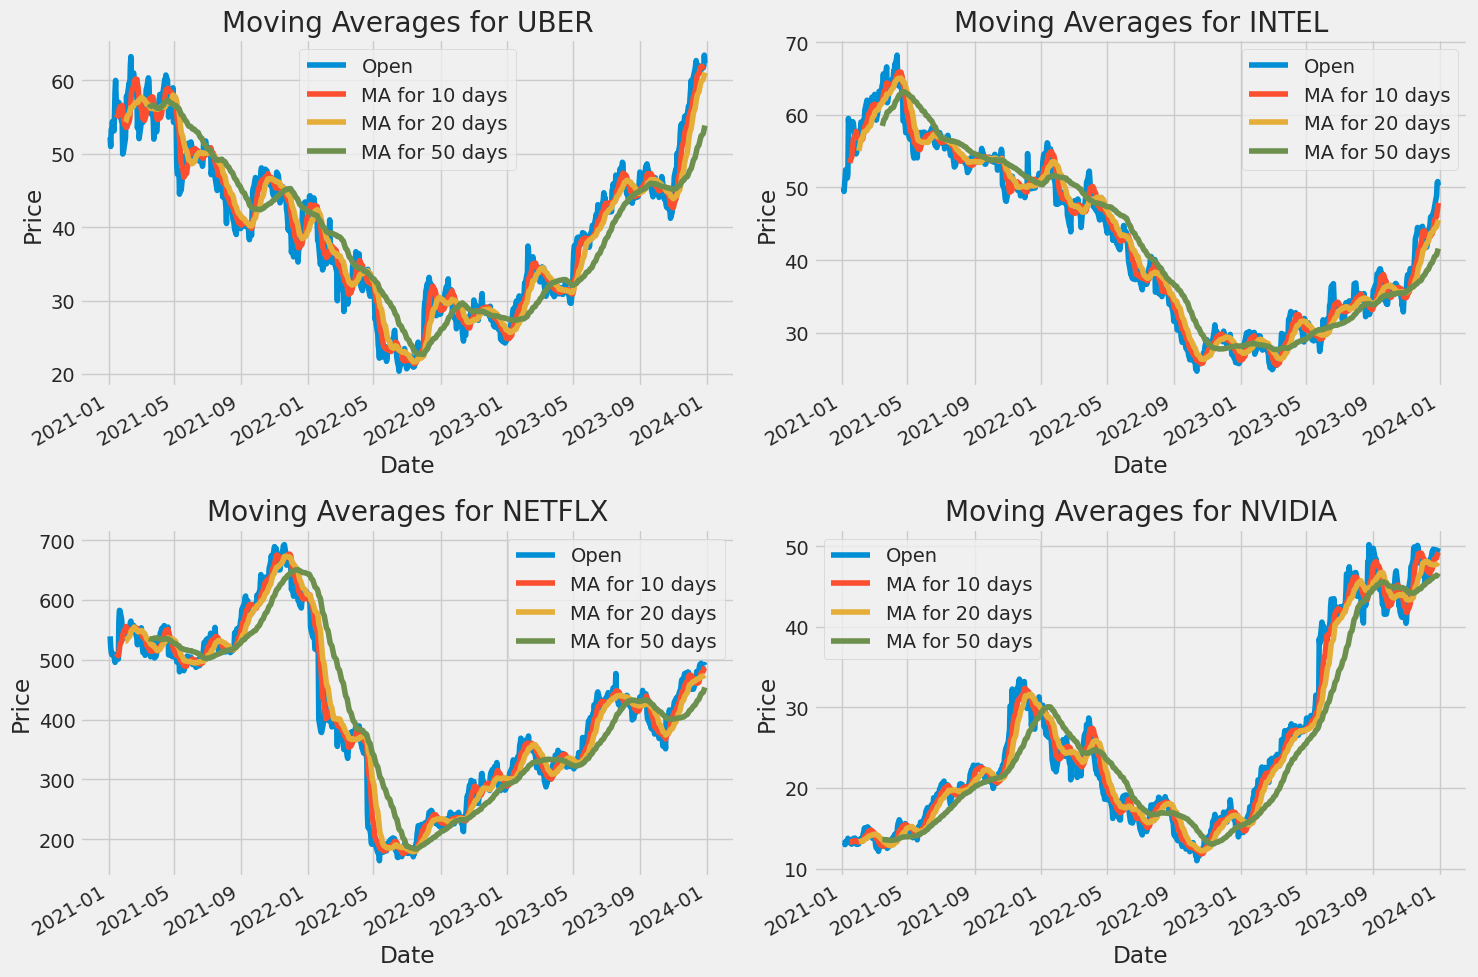

In [11]:
# Vẽ biểu đồ Moving Averages
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15, 10))
fig.subplots_adjust(hspace=0.4, wspace=0.4)

for ax, (company, df) in zip(axes.flatten(), company_dataframes.items()):
    df[['Open', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=ax)
    ax.set_title(f"Moving Averages for {company}")
    ax.set_xlabel('Date')
    ax.set_ylabel('Price')

plt.tight_layout()
plt.show()

### Long Short term memory (LTSM-RNN)

In [64]:
# Chọn dữ liệu cho một công ty để huấn luyện
company_name = 'NVIDIA'  # Có thể thay đổi tên công ty theo nhu cầu
if company_name in company_dataframes:
    company_df = company_dataframes[company_name]
else:
    raise ValueError(f"Công ty {company_name} không tồn tại trong dữ liệu.")

features = company_df.drop(['Open'], axis=1).values
target = company_df['Open'].values

In [65]:
# Kiểm tra NaN hoặc Inf trong dữ liệu trước khi chuẩn hóa
print("Kiểm tra NaN:", np.isnan(features).any())
print("Kiểm tra Inf:", np.isinf(features).any())

# Kiểm tra thống kê cơ bản để xác định các cột bất thường
print(pd.DataFrame(features).describe())


Kiểm tra NaN: True
Kiểm tra Inf: False
                0           1           2           3             4      5  \
count  753.000000  753.000000  753.000000  753.000000  7.530000e+02  753.0   
mean    24.837371   24.864097   25.315043   24.368803  2.306339e+06    1.0   
std     11.196268   11.194415   11.349365   11.040056  3.852860e+04    0.0   
min     11.215970   11.227000   11.735000   10.813000  2.247775e+06    1.0   
25%     15.975381   15.987000   16.309999   15.597000  2.275980e+06    1.0   
50%     21.249542   21.264999   21.799000   20.888000  2.302390e+06    1.0   
75%     29.406487   29.459000   30.389999   28.778000  2.345034e+06    1.0   
max     50.390285   50.409000   50.548000   49.411999  2.376807e+06    1.0   

           6           7           8           9  
count  753.0  744.000000  734.000000  704.000000  
mean     0.5   24.769240   24.687260   24.436341  
std      0.0   11.030409   10.836225   10.239658  
min      0.5   11.815700   12.198100   13.011140  
25%

In [66]:
# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(features)
target_scaler = MinMaxScaler()
scaled_target = target_scaler.fit_transform(target.reshape(-1, 1))

In [67]:
# Kiểm tra và xử lý NaN trong scaled_features
if np.isnan(scaled_features).any():
    print("NaN được phát hiện trong scaled_features. Xử lý bằng cách thay thế giá trị NaN.")
    nan_indices = np.where(np.isnan(scaled_features))
    print(f"Vị trí NaN: {nan_indices}")

    # Thay thế giá trị NaN bằng trung bình cột tương ứng
    col_means = np.nanmean(scaled_features, axis=0)
    for col in nan_indices[1]:  # Duyệt qua các cột chứa NaN
        scaled_features[:, col] = np.nan_to_num(scaled_features[:, col], nan=col_means[col])

print("Chuẩn hóa dữ liệu hoàn tất!")


NaN được phát hiện trong scaled_features. Xử lý bằng cách thay thế giá trị NaN.
Vị trí NaN: (array([ 0,  0,  0,  1,  1,  1,  2,  2,  2,  3,  3,  3,  4,  4,  4,  5,  5,
        5,  6,  6,  6,  7,  7,  7,  8,  8,  8,  9,  9, 10, 10, 11, 11, 12,
       12, 13, 13, 14, 14, 15, 15, 16, 16, 17, 17, 18, 18, 19, 20, 21, 22,
       23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39,
       40, 41, 42, 43, 44, 45, 46, 47, 48]), array([7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7, 8, 9, 7,
       8, 9, 7, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8, 9, 8,
       9, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9,
       9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]))
Chuẩn hóa dữ liệu hoàn tất!


In [68]:
# Tạo dữ liệu huấn luyện
training_data_len = int(np.ceil(len(features) * 0.95))
train_features = scaled_features[:training_data_len, :]
train_target = scaled_target[:training_data_len, :]

x_train, y_train = [], []
for i in range(60, len(train_features)):
    x_train.append(train_features[i-60:i, :])
    y_train.append(train_target[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))


In [18]:
# Xây dựng mô hình LSTM
model = Sequential()
model.add(LSTM(256, return_sequences=True, input_shape=(x_train.shape[1], x_train.shape[2])))
model.add(Dropout(0.2))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(64))
model.add(Dropout(0.2))
model.add(Dense(1))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history_rnn = model.fit(x_train, y_train, batch_size=32, epochs=100, validation_split=0.2, callbacks=[early_stop])


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 17s 504ms/step - loss: 0.0319 - val_loss: 0.0353
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 472ms/step - loss: 0.0031 - val_loss: 0.0082
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 420ms/step - loss: 0.0025 - val_loss: 0.0042
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 12s 495ms/step - loss: 0.0023 - val_loss: 0.0069
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 9s 447ms/step - loss: 0.0019 - val_loss: 0.0042
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 8s 286ms/step - loss: 0.0018 - val_loss: 0.0123
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 7s 405ms/step - loss: 0.0015 - val_loss: 0.0089
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 295ms/step - loss: 0.0015 - val_loss: 0.0203
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 5s 313ms/step - loss: 0.0017 - val_loss: 0.0117
Epoch 10/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 295ms/step - loss: 0.0013 - val_loss: 0.0097
Epoch 11/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 10s 285ms/step - loss: 0.0012 - val_loss: 0.0023
Epoch 12/100
17/17 ━━━━━━━━━━━━━━━━━━

In [19]:
# Tạo dữ liệu kiểm tra
x_test = []
for i in range(60, len(scaled_features)):
    x_test.append(scaled_features[i-60:i])

x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

predictions = model.predict(x_test)
predictions = target_scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 126ms/step


In [21]:
# Tính RMSE
actual = target[60:]
rmse = np.sqrt(np.mean(((predictions.flatten() - actual) ** 2)))
print(f"RMSE: {rmse}")

# Tính MAE (Mean Absolute Error)
mae = mean_absolute_error(actual, predictions.flatten())
print(f"MAE: {mae}")

# Tính R² Score
r2 = r2_score(actual, predictions.flatten())
print(f"R² Score: {r2}")

RMSE: 1.4598396275411394
MAE: 1.1166100563371015
R² Score: 0.9828537232596759


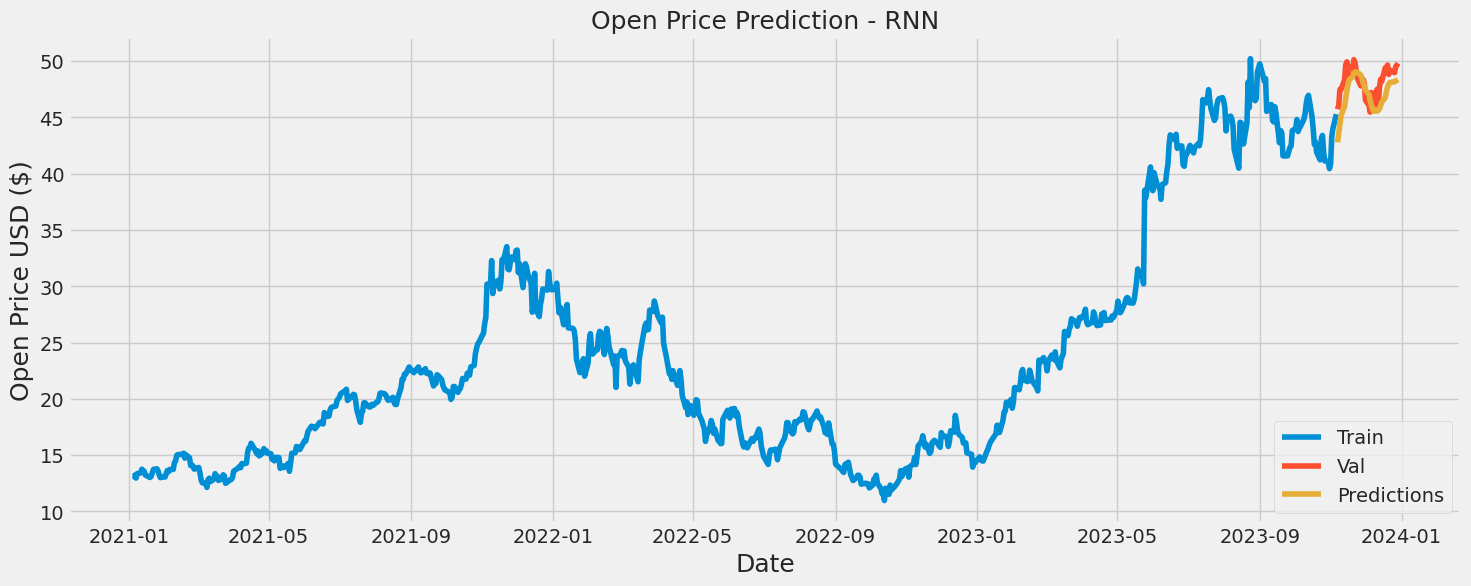

In [22]:
# Biểu đồ dự đoán
train = company_df[:training_data_len]
valid = company_df[training_data_len:]
valid = valid.copy()
valid['Predictions'] = predictions[-len(valid):]

plt.figure(figsize=(16, 6))
plt.title('Open Price Prediction - RNN', fontsize=18)
plt.xlabel('Date', fontsize=18)
plt.ylabel('Open Price USD ($)', fontsize=18)
plt.plot(train['Open'], label='Train')
plt.plot(valid['Open'], label='Val')
plt.plot(valid['Predictions'], label='Predictions')
plt.legend(loc='lower right')
plt.show()


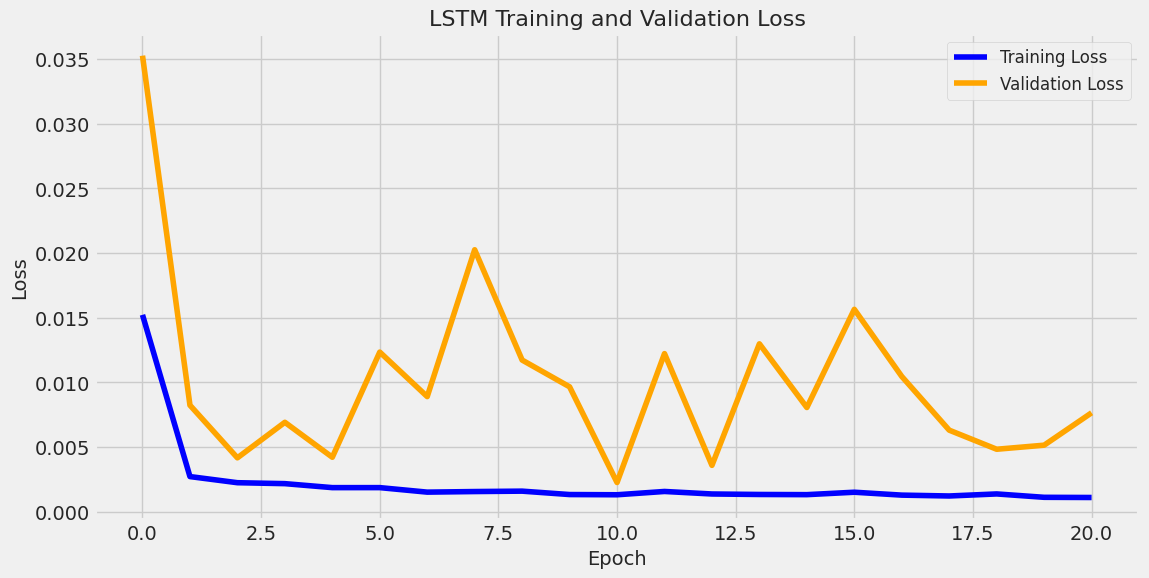

In [23]:
plt.figure(figsize=(12, 6))
plt.plot(history_rnn.history['loss'], label='Training Loss', color='blue')
plt.plot(history_rnn.history['val_loss'], label='Validation Loss', color='orange')
plt.title('LSTM Training and Validation Loss', fontsize=16)
plt.xlabel('Epoch', fontsize=14)
plt.ylabel('Loss', fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

Processing predictions for UBER...
Handling NaN for UBER data.
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 106ms/step
UBER RMSE: 1.934935670678504
UBER MAE: 1.5357188957845405
UBER R² Score: 0.9626909890817794


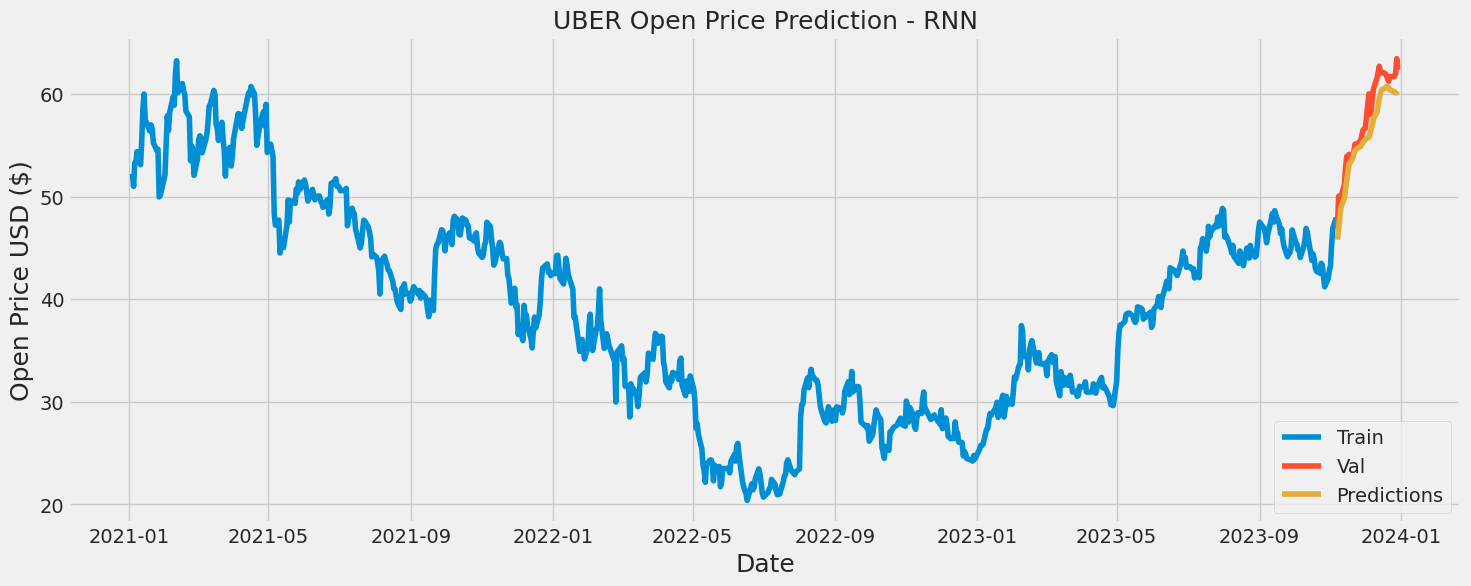

Processing predictions for INTEL...
Handling NaN for INTEL data.
22/22 ━━━━━━━━━━━━━━━━━━━━ 3s 114ms/step
INTEL RMSE: 1.885960005234816
INTEL MAE: 1.4967345585744305
INTEL R² Score: 0.9696823410921352


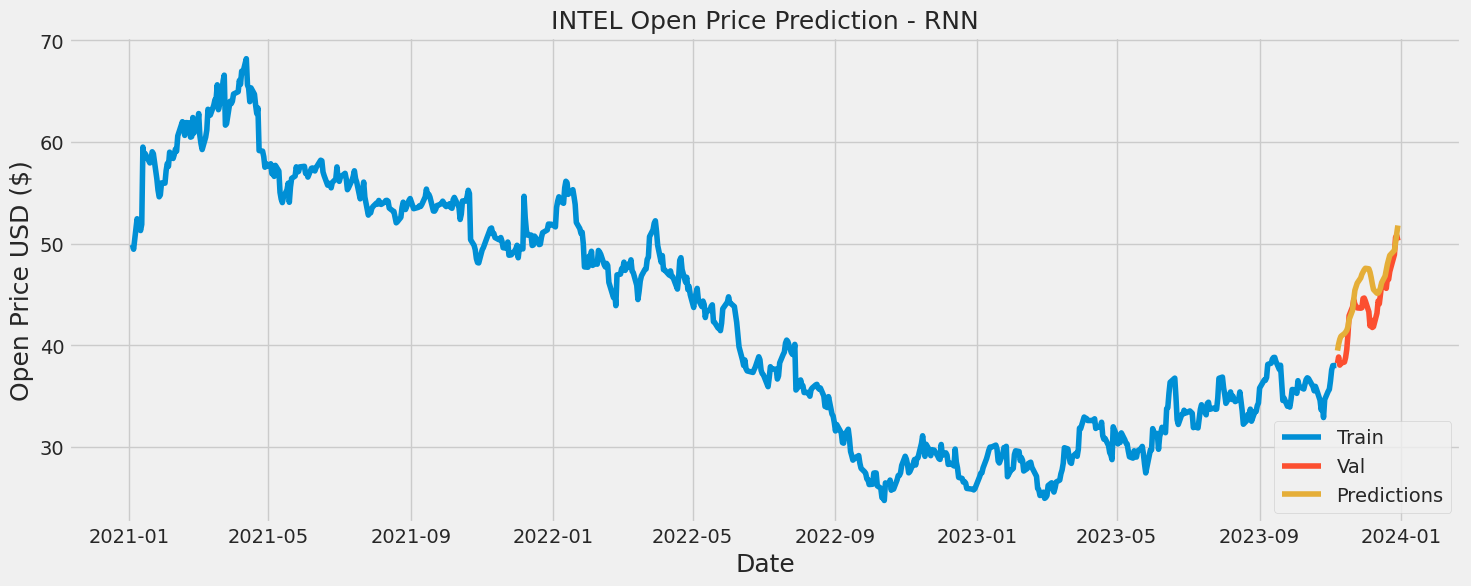

Processing predictions for NETFLX...
Handling NaN for NETFLX data.
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step
NETFLX RMSE: 23.45014061526319
NETFLX MAE: 18.17848822010845
NETFLX R² Score: 0.969387771133629


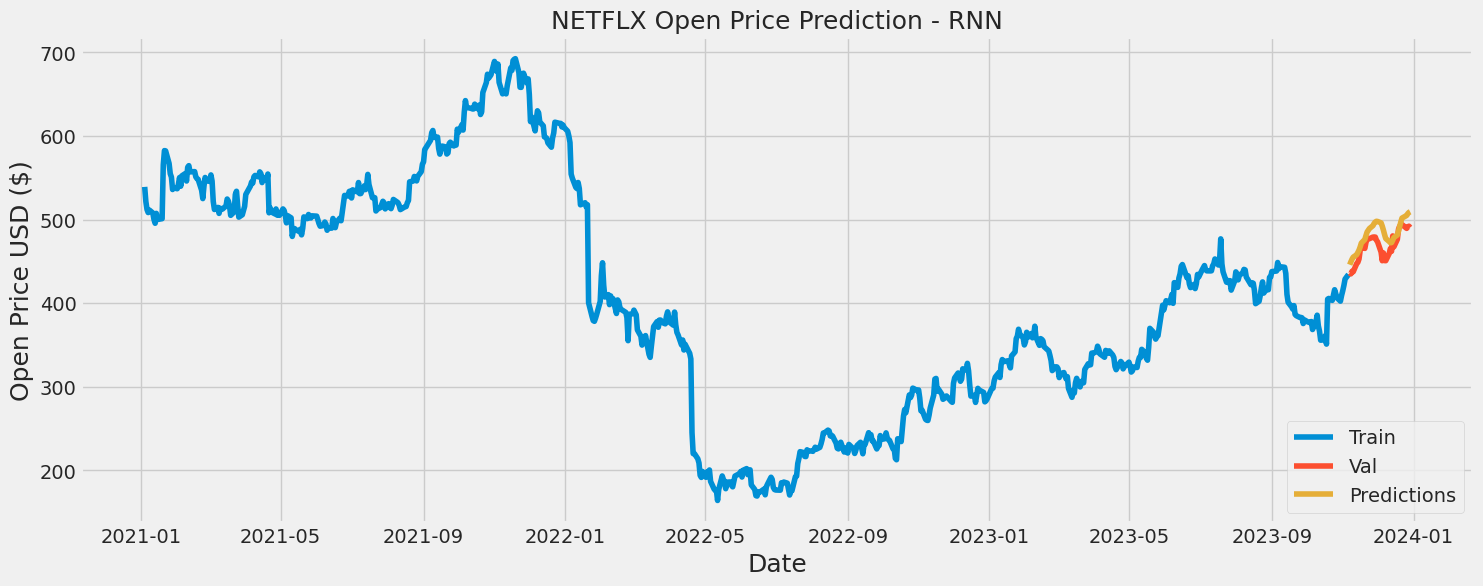

Processing predictions for NVIDIA...
Handling NaN for NVIDIA data.
22/22 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step
NVIDIA RMSE: 1.4598396275411394
NVIDIA MAE: 1.1166100563371015
NVIDIA R² Score: 0.9828537232596759


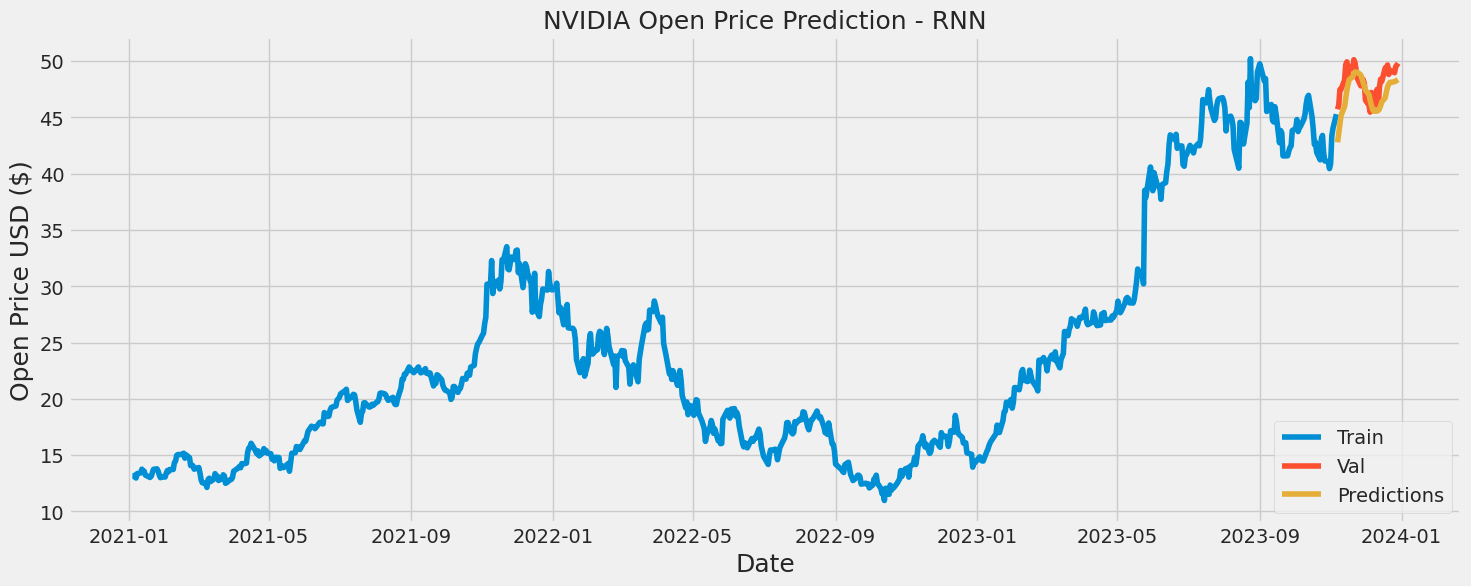

In [25]:
# Tạo biểu đồ dự đoán cho từng công ty
for company, company_df in company_dataframes.items():
    print(f"Processing predictions for {company}...")

    # Chọn dữ liệu của công ty
    features = company_df.drop(['Open'], axis=1).values
    target = company_df['Open'].values

    # Xử lý NaN trước khi chuẩn hóa
    if np.isnan(features).any() or np.isnan(target).any():
        print(f"Handling NaN for {company} data.")
        col_means = np.nanmean(features, axis=0)
        nan_indices = np.where(np.isnan(features))
        for col in nan_indices[1]:
            features[:, col] = np.nan_to_num(features[:, col], nan=col_means[col])
        target = np.nan_to_num(target, nan=np.nanmean(target))

    # Chuẩn hóa dữ liệu
    scaler = MinMaxScaler()
    scaled_features = scaler.fit_transform(features)
    target_scaler = MinMaxScaler()
    scaled_target = target_scaler.fit_transform(target.reshape(-1, 1))

    # Tạo dữ liệu huấn luyện
    training_data_len = int(np.ceil(len(features) * 0.95))
    train_features = scaled_features[:training_data_len, :]
    train_target = scaled_target[:training_data_len, :]

    x_train, y_train = [], []
    for i in range(60, len(train_features)):
        x_train.append(train_features[i-60:i, :])
        y_train.append(train_target[i, 0])

    x_train, y_train = np.array(x_train), np.array(y_train)
    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], x_train.shape[2]))

    # Dự đoán trên dữ liệu kiểm tra
    x_test, y_test = [], []
    for i in range(60, len(scaled_features)):
        x_test.append(scaled_features[i-60:i])
        y_test.append(scaled_target[i, 0])

    x_test = np.array(x_test)
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], x_test.shape[2]))

    # Thực hiện dự đoán
    predictions = model.predict(x_test)
    predictions = target_scaler.inverse_transform(predictions)

    # Tính RMSE
    actual = target[60:]
    rmse = np.sqrt(np.mean(((predictions.flatten() - actual) ** 2)))
    print(f"{company} RMSE: {rmse}")

    # Tính MAE (Mean Absolute Error)
    mae = mean_absolute_error(actual, predictions.flatten())
    print(f"{company} MAE: {mae}")

    # Tính R² Score
    r2 = r2_score(actual, predictions.flatten())
    print(f"{company} R² Score: {r2}")

    # Biểu đồ
    train = company_df[:training_data_len]
    valid = company_df[training_data_len:]
    valid = valid.copy()
    valid['Predictions'] = predictions[-len(valid):]

    plt.figure(figsize=(16, 6))
    plt.title(f'{company} Open Price Prediction - RNN', fontsize=18)
    plt.xlabel('Date', fontsize=18)
    plt.ylabel('Open Price USD ($)', fontsize=18)
    plt.plot(train['Open'], label='Train')
    plt.plot(valid['Open'], label='Val')
    plt.plot(valid['Predictions'], label='Predictions')
    plt.legend(loc='lower right')
    plt.show()


### FFNN

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.regularizers import l2

# Xây dựng mô hình Feedforward Neural Network (FFNN)
ffnn_model = Sequential()

# Thêm lớp Flatten để chuyển dữ liệu đầu vào thành dạng phẳng (flattened)
ffnn_model.add(Flatten(input_shape=(x_train.shape[1], x_train.shape[2])))

# Thêm lớp ẩn đầu tiên với 128 neuron, L2 Regularization và Dropout
ffnn_model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.001)))
ffnn_model.add(Dropout(0.3))  # Tăng Dropout để giảm overfitting

# Thêm lớp ẩn thứ hai với 64 neuron, L2 Regularization và Dropout
ffnn_model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.001)))
ffnn_model.add(Dropout(0.3))  # Tăng Dropout

# Lớp đầu ra với một neuron (dự đoán giá trị liên tục)
ffnn_model.add(Dense(1))

# Biên dịch mô hình với Adam optimizer và loss function là mean squared error
optimizer = Adam(learning_rate=0.0005)  # Giảm learning rate để học ổn định hơn
ffnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

# Thiết lập EarlyStopping và ReduceLROnPlateau
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-5, verbose=1)

# Huấn luyện mô hình
history_ffnn = ffnn_model.fit(
    x_train,
    y_train,
    batch_size=32,
    epochs=100,
    validation_split=0.2,
    callbacks=[early_stop, reduce_lr]
)


Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


17/17 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 0.3591 - val_loss: 0.2853 - learning_rate: 5.0000e-04
Epoch 2/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2770 - val_loss: 0.3000 - learning_rate: 5.0000e-04
Epoch 3/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.2524 - val_loss: 0.2977 - learning_rate: 5.0000e-04
Epoch 4/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2290 - val_loss: 0.2277 - learning_rate: 5.0000e-04
Epoch 5/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.2078 - val_loss: 0.2104 - learning_rate: 5.0000e-04
Epoch 6/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1920 - val_loss: 0.2210 - learning_rate: 5.0000e-04
Epoch 7/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1798 - val_loss: 0.2170 - learning_rate: 5.0000e-04
Epoch 8/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 0.1685 - val_loss: 0.1601 - learning_rate: 5.0000e-04
Epoch 9/100
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.1570 - val_loss: 0.1541 - learning_rate: 5.000

In [70]:
predictions_ffnn = ffnn_model.predict(x_test)
predictions_ffnn = target_scaler.inverse_transform(predictions)

22/22 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


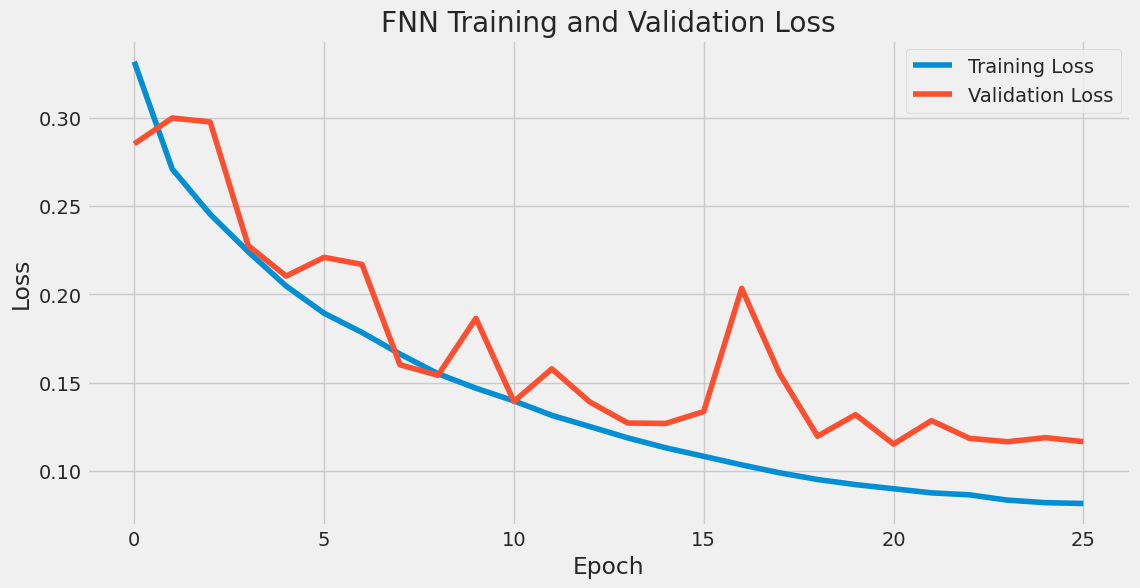

In [71]:
# Biểu đồ mất mát của Feedforward Neural Network
plt.figure(figsize=(12, 6))
plt.plot(history_ffnn.history['loss'], label='Training Loss')
plt.plot(history_ffnn.history['val_loss'], label='Validation Loss')
plt.title('FNN Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


### Other models

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [76]:
# Xác định X (feature) và y (target)
X = df.drop(['Open'], axis=1)  # Bỏ cột mục tiêu 'Open'
y = df['Open']  # Cột mục

imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Chuẩn hóa dữ liệu
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1, 1))

# Chia dữ liệu thành train và test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


#### Linear Regression

In [77]:
# Linear Regression Model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Dự đoán
y_pred_lr = lr_model.predict(X_test)

# Đánh giá mô hình
mse_lr = mean_squared_error(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Results:")
print(f"Mean Squared Error: {mse_lr}")
print(f"Mean Absolute Error: {mae_lr}")
print(f"R2 Score: {r2_lr}")


Linear Regression Results:
Mean Squared Error: 5.0236206932044265e-05
Mean Absolute Error: 0.004748576603824439
R2 Score: 0.9994414939862529


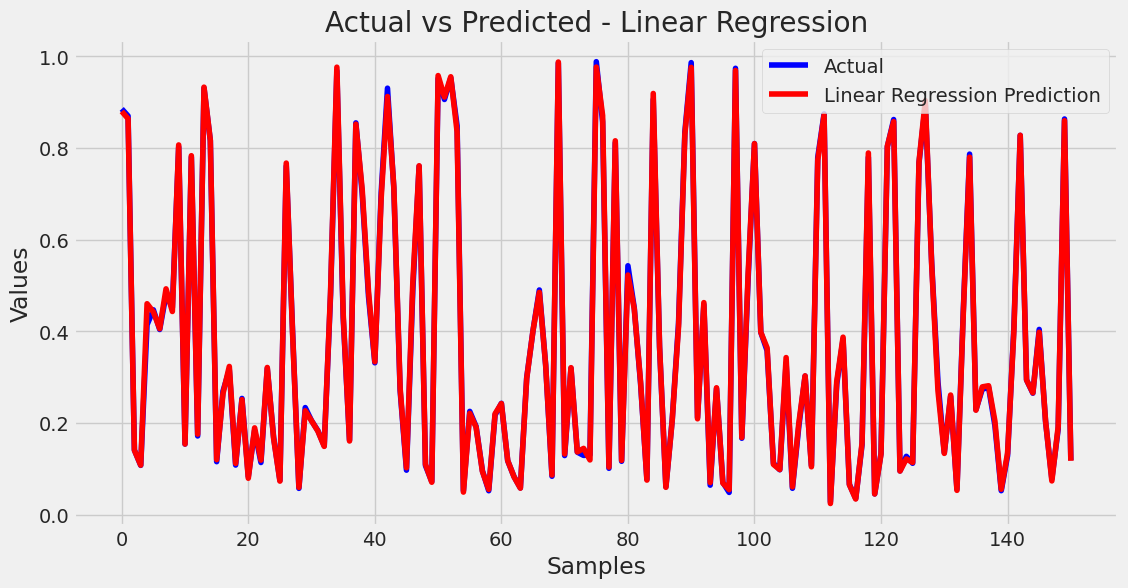

In [84]:
# Biểu đồ Linear Regression
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')  # Giá trị thực tế
plt.plot(y_pred_lr, label='Linear Regression Prediction', color='red')  # Dự đoán Linear Regression
plt.title("Actual vs Predicted - Linear Regression")
plt.xlabel("Samples")
plt.ylabel("Values")
plt.legend()
plt.show()


#### SVM

In [78]:
# SVM Model
svm_model = SVR(kernel='rbf')  # Sử dụng kernel RBF
svm_model.fit(X_train, y_train)

# Dự đoán
y_pred_svm = svm_model.predict(X_test)

# Đánh giá mô hình
mse_svm = mean_squared_error(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
r2_svm = r2_score(y_test, y_pred_svm)

print("SVM Results:")
print(f"Mean Squared Error: {mse_svm}")
print(f"Mean Absolute Error: {mae_svm}")
print(f"R2 Score: {r2_svm}")


SVM Results:
Mean Squared Error: 0.002120501091618631
Mean Absolute Error: 0.038215506805999645
R2 Score: 0.9764251187708428


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


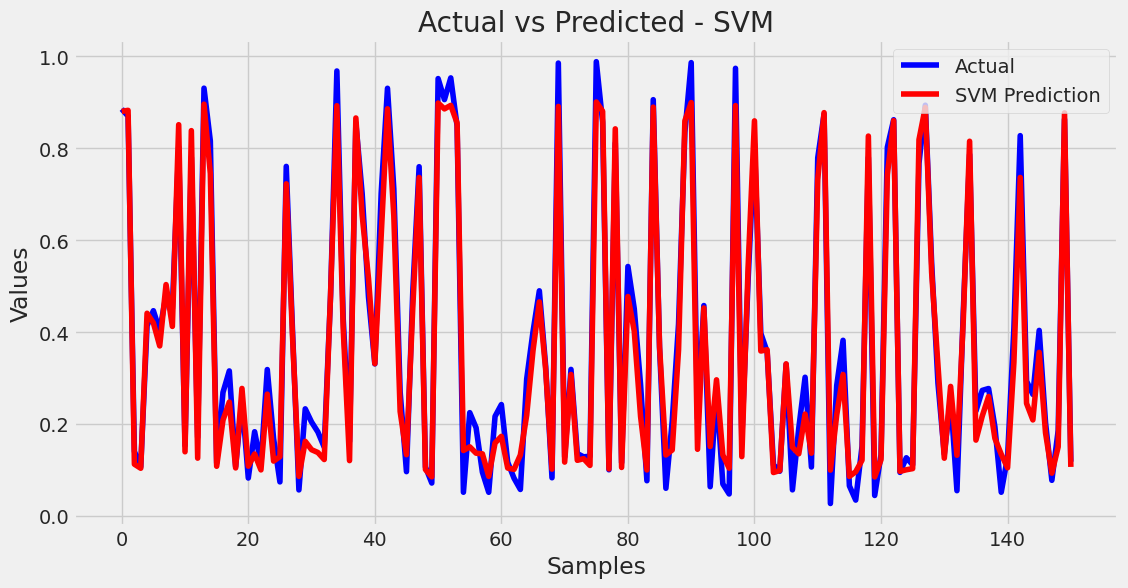

In [87]:
# Biểu đồ SVM
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')  # Giá trị thực tế
plt.plot(y_pred_svm, label='SVM Prediction', color='red')  # Dự đoán SVM
plt.title("Actual vs Predicted - SVM")
plt.xlabel("Samples")
plt.ylabel("Values")
plt.legend()
plt.show()


#### Decision Tree

In [79]:
# Decision Tree Model
dt_model = DecisionTreeRegressor(max_depth=10, random_state=42)
dt_model.fit(X_train, y_train)

# Dự đoán
y_pred_dt = dt_model.predict(X_test)

# Đánh giá mô hình
mse_dt = mean_squared_error(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)

print("Decision Tree Results:")
print(f"Mean Squared Error: {mse_dt}")
print(f"Mean Absolute Error: {mae_dt}")
print(f"R2 Score: {r2_dt}")


Decision Tree Results:
Mean Squared Error: 0.00020554993331363053
Mean Absolute Error: 0.009968512869536466
R2 Score: 0.9977147782268619


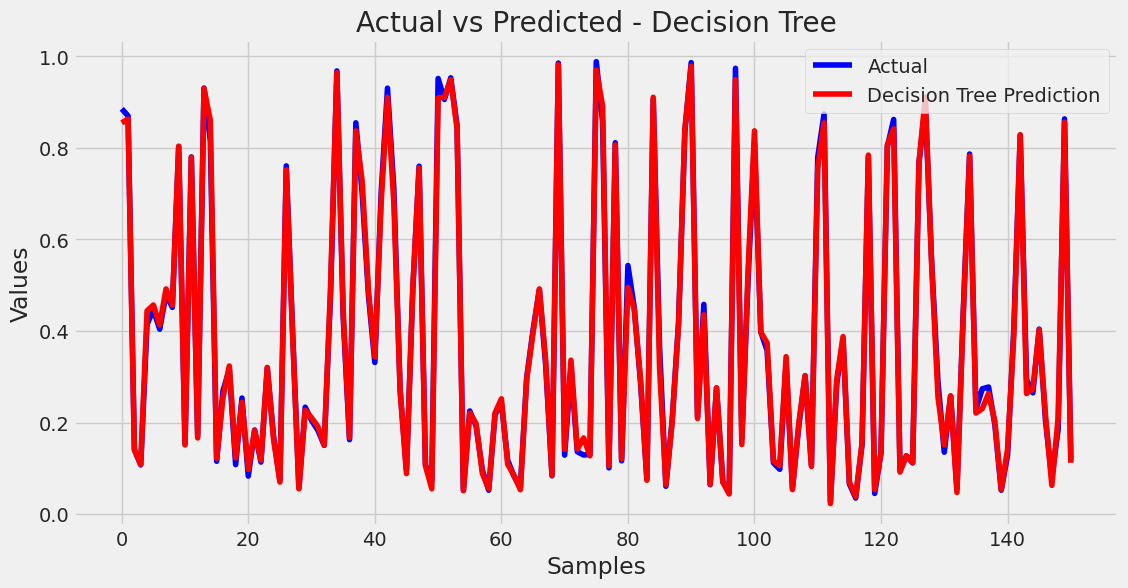

In [85]:
# Biểu đồ Decision Tree
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')  # Giá trị thực tế
plt.plot(y_pred_dt, label='Decision Tree Prediction', color='red')  # Dự đoán Decision Tree
plt.title("Actual vs Predicted - Decision Tree")
plt.xlabel("Samples")
plt.ylabel("Values")
plt.legend()
plt.show()



#### Random Forest

In [80]:
# Random Forest Model
rf_model = RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
rf_model.fit(X_train, y_train)

# Dự đoán
y_pred_rf = rf_model.predict(X_test)

# Đánh giá mô hình
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("Random Forest Results:")
print(f"Mean Squared Error: {mse_rf}")
print(f"Mean Absolute Error: {mae_rf}")
print(f"R2 Score: {r2_rf}")


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Random Forest Results:
Mean Squared Error: 0.00011919706507754301
Mean Absolute Error: 0.00788275657076181
R2 Score: 0.9986748148052486


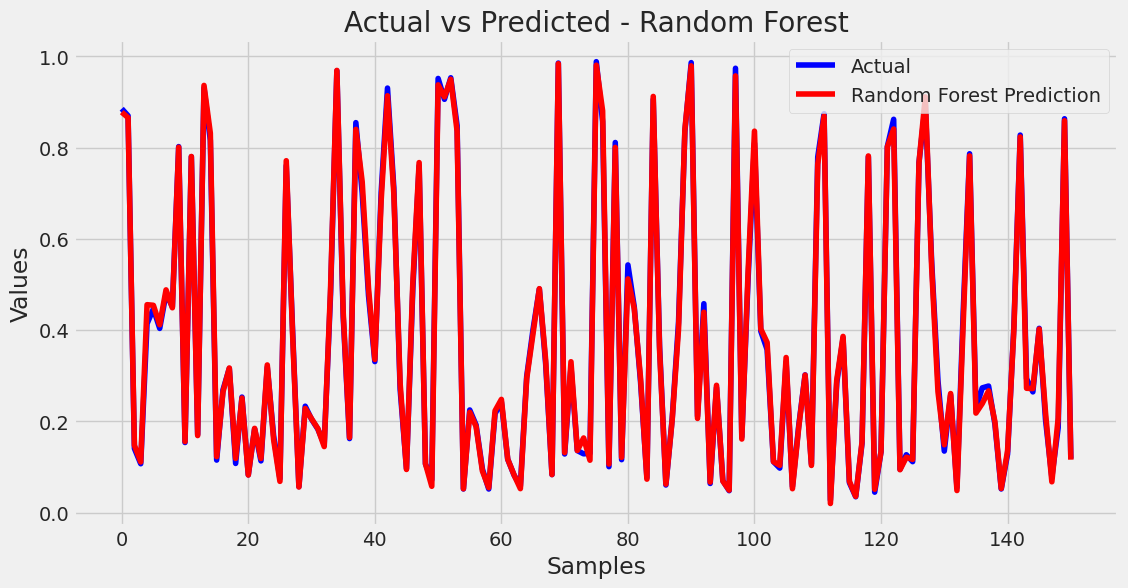

In [86]:
# Biểu đồ Random Forest
plt.figure(figsize=(12, 6))
plt.plot(y_test, label='Actual', color='blue')  # Giá trị thực tế
plt.plot(y_pred_rf, label='Random Forest Prediction', color='red')  # Dự đoán Random Forest
plt.title("Actual vs Predicted - Random Forest")
plt.xlabel("Samples")
plt.ylabel("Values")
plt.legend()
plt.show()


##Question 3

###About Project

####Voice Activity Detection using CNN-BiLSTM

* Dataset (52 minutes 34 seconds, 719 files)

* TIMIT: is a corpus of read speech, designed to provide speech data for acoustic and phonetic studies and evaluation of automatic speech recognition system.

* PTDB-TUG: is a speech database for pitch tracking that provide microphone signals of 20 English speakers.

* Noizeus: contains speech data of 30 sentences. Noise signal (from AURORA database) is artificially added to the speech signal, in particular the database contains audio corrupted with babble (crowd of preople), street, train, train station, car and restaurant noise at SNRs of 5dB, and the original ones.

####References


 https://www.kaggle.com/code/alexklyu/voice-activity-detection-using-cnn-bilstm

###Preparing

####Import libraries

In [ ]:
import numpy as np
import pandas as pd
import textgrids
import os # Working with directories
import python_speech_features # For exctracting features for deep learning
from tqdm import tqdm # Progress meter
from sklearn import model_selection, preprocessing, metrics # Preparation data
from tensorflow.keras import models, layers
import tensorflow as tf
import librosa
from pydub.utils import mediainfo
import threading
import kagglehub


In [ ]:
!pip install praat-textgrids
!pip install python_speech_features
!pip install pydub

  Preparing metadata (setup.py) ... done
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5868 sha256=a01bc7009e0413850195f3368a2846c42ec60a17fc93d3f06e12657da596b1aa
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


####Parameters

In [ ]:
# Set params for model:
preemphasis_coef = 0.97 # Coefficient for pre-processing filter
frame_length = 0.025 # Window length in sec
frame_step = 0.01 # Length of step in sec
num_nfft = 512 # Point for FFT
num_features = 32 # Number of Mel filters
n_frames = 32 # Number of frames for uniting in image
FRAME_DURATION = 30 # 30 msec
OVERLAP_RATE = 0.0 # frames don't overlap

####Download latest version

In [ ]:
path = kagglehub.dataset_download("lazyrac00n/speech-activity-detection-datasets")

print("Path to dataset files:", path)

100%|██████████| 138M/138M [00:02<00:00, 56.5MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/lazyrac00n/speech-activity-detection-datasets/versions/1


####Connect with my drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


####All function which used in my project

#####Load data

In [ ]:
def readFile(path):
    '''
    Read the file and return the list of SPEECH/NONSPEECH labels for each frame
    '''

    labeled_list  = []

    # Check if the file exists before attempting to open it
    if not os.path.exists(path):
        raise FileNotFoundError(f"File not found: {path}")

    grid = textgrids.TextGrid(path)

    for interval in grid['silences']:
        label = int(interval.text)

        dur = interval.dur
        dur_msec = dur * 1000 # sec -> msec
        num_frames = int(round(dur_msec /30)) # the audio is divided into 30 msec frames
        print(dur_msec)
        for i in range(num_frames):

            labeled_list.append(label)

    return labeled_list



#####Load all files

In [ ]:
# Function for reading labels from .TextGrig file:
def readLabels(path, sample_rate):
    """
    Reads a .TextGrid file and returns a list of SPEECH/NONSPEECH labels for each frame.

    Parameters:
        path (str): Path to the .TextGrid file.
        sample_rate (int): Sample rate of the audio in Hz.

    Returns:
        list: A list of integers representing labels for each frame.
              Each element corresponds to either SPEECH (1) or NONSPEECH (0).
    """
    labeled_list  = []
    grid = textgrids.TextGrid(path)

    for interval in grid['silences']:
        label = int(interval.text)

        dur = interval.dur
        dur_samples = int(np.round(dur * sample_rate)) # sec -> num of samples

        for i in range(dur_samples):
            labeled_list.append(label)

    return labeled_list

In [ ]:
def getFiles(path, extension):
    """
    Get a list of file paths with a specific extension from a given directory and its subdirectories.

    Parameters:
    path (str): The root directory to search for files.
    extension (str): The file extension to filter by (e.g., '.txt').

    Returns:
    list(str): A list of file paths that match the given extension.
    """
    list_paths = list()
    for root, dirs, files in os.walk(path):
        for file in files:
            if(file.endswith(extension)):
                list_paths.append(os.path.join(root, file))
    return list_paths

#####Cal all time in dataset

In [ ]:
def get_audio_duration(audio_file, result):
    '''
    Retrieves the duration of an audio file and appends it to a list.

    Parameters:
        audio_file (str): The path to the audio file whose duration is to be calculated.
        result (List[float]): A list to store the duration of the audio file in seconds.

    Returns:
        None: The function appends the duration to the provided list and returns nothing.

    '''
    audio_info = mediainfo(audio_file)  # Lấy thông tin về audio
    duration = float(audio_info['duration'])  # Thời gian trong giây
    result.append(duration)


####Show result in .TextGrid

#####Load file

In [ ]:


annotation_path = "/content/drive/MyDrive/Annotation/Female/TMIT/SI2220.TextGrid"
audio_path = "/content/drive/MyDrive/Audio/Female/TMIT/SI2220.wav"

# read annotaion
label_list = readFile(annotation_path)

# read wav file
data, fs = librosa.load(audio_path)

170.40362811791388
215.99999999999997
136.0
1296.0
167.99999999999991
120.00000000000011
152.00000000000014
199.99999999999974
466.4036281179138


#####Plot signal

######Preparing the variable



In [ ]:
# define time axis
Ns = len(data)  # number of sample
Ts = 1 / fs  # sampling period
t = np.arange(Ns) * 1000 * Ts  # time axis


shift = 1 - OVERLAP_RATE
frame_length = int(np.floor(FRAME_DURATION * fs / 1000)) # frame length in sample
frame_shift = round(frame_length * shift)# frame shift in sample

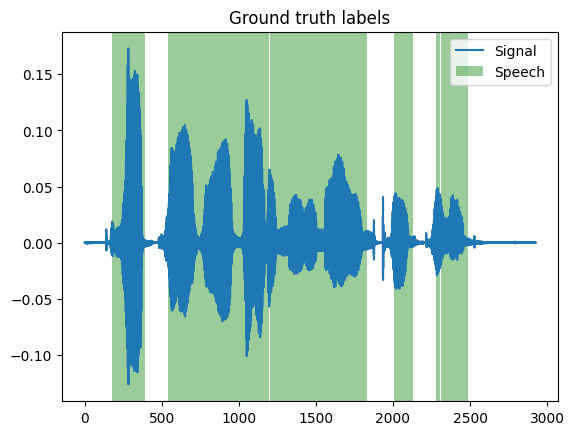

In [ ]:
import matplotlib.pyplot as plt

figure = plt.Figure(figsize=(10, 7), dpi=85)
plt.plot(t, data)

for i, frame_labeled in enumerate(label_list):
    idx = i * frame_shift
    if (frame_labeled == 1):
        plt.axvspan(xmin= t[idx], xmax=t[idx + frame_length-1], ymin=-1000, ymax=1000, alpha=0.4, zorder=-100, facecolor='g', label='Speech')

plt.title("Ground truth labels")
plt.legend(['Signal', 'Speech'])
plt.show()

In [ ]:
print(len(label_list))
print(len(t))
print(len(data))

99
64492
64492


###Speech Activity Detection:

####Data processing

In [ ]:
annotation_path = '/content/drive/MyDrive/Annotation/'
annotation_extension = '.TextGrid'
audio_path = '/content/drive/MyDrive/Audio/'
audio_extension = '.wav'

annotation_files = getFiles(path=annotation_path, extension=annotation_extension)
audio_files = getFiles(path=audio_path, extension=audio_extension)
annotation_files = sorted(annotation_files)
audio_files = sorted(audio_files)

print('Number of files:', len(audio_files))

Number of files: 719


In [ ]:

total_duration = 0
threads = []
result = []

for audio_file in audio_files:
    thread = threading.Thread(target=get_audio_duration, args=(audio_file, result))
    threads.append(thread)
    thread.start()

for thread in threads:
    thread.join()

total_duration = sum(result)
minutes = (total_duration % 3600) // 60
seconds = total_duration % 60

formatted_time = f"{int(minutes)} minutes {int(seconds)} seconds"
print(f"Total time in dataset: {formatted_time}")


Total time in dataset: 52 minutes 34 seconds


In [ ]:
# Extraction features for each file:
dataset = list()
for i in tqdm(range(len(audio_files))):
    sig, sample_rate = librosa.load(audio_files[i])
    markers = readLabels(path=annotation_files[i], sample_rate=sample_rate)

    # Extract logfbank features:
    features_logfbank = python_speech_features.base.logfbank(signal=sig, samplerate=sample_rate, winlen=frame_length, winstep=frame_step, nfilt=num_features,
                                                                        nfft=num_nfft, lowfreq=0, highfreq=None, preemph=preemphasis_coef)

    # Reshape labels for each group of features:
    markers_of_frames = python_speech_features.sigproc.framesig(sig=markers, frame_len=frame_length * sample_rate, frame_step=frame_step * sample_rate,
                                                                winfunc=np.ones)

    # For every frame calc label:
    marker_per_frame = np.zeros(markers_of_frames.shape[0])
    marker_per_frame = np.array([1 if np.sum(markers_of_frames[j], axis=0) > markers_of_frames.shape[0] / 2 else 0 for j in range(markers_of_frames.shape[0])])

    spectrogram_image = np.zeros((n_frames, n_frames))
    for j in range(int(np.floor(features_logfbank.shape[0] / n_frames))):
        spectrogram_image = features_logfbank[j * n_frames:(j + 1) * n_frames]
        label_spectrogram_image = 1 if np.sum(marker_per_frame[j * n_frames:(j + 1) * n_frames]) > n_frames / 2 else 0
        dataset.append((label_spectrogram_image, spectrogram_image))

100%|██████████| 719/719 [01:01<00:00, 11.68it/s]


In [ ]:
markers_of_frames.shape

(262, 551)

####Build and train the model:

#####Preparation data:

In [ ]:
# Split dataset on train and test:
X = list()
y = list()
for i in range(len(dataset)):
    X.append(dataset[i][1])
    y.append(dataset[i][0])
X = np.array(X)
y = np.array(y)

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.33, shuffle=True, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# Reshaping for scaling:
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1] * X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1] * X_test.shape[2])

# Scale data:
scaler = preprocessing.StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# And reshape back:
X_train = X_train.reshape(X_train.shape[0], n_frames, n_frames)
X_test = X_test.reshape(X_test.shape[0], n_frames, n_frames)

(6342, 32, 32) (3125, 32, 32) (6342,) (3125,)


In [ ]:
# Encoding label:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [ ]:
# Reshape data for convolution layer:
stride = int(15)

X_train_reshaped = X_train[:int(np.floor(X_train.shape[0] / stride) * stride)]
X_test_reshaped = X_test[:int(np.floor(X_test.shape[0] / stride) * stride)]

y_train_reshaped = y_train[:int(np.floor(X_train.shape[0] / stride) * stride)]
y_test_reshaped = y_test[:int(np.floor(X_test.shape[0] / stride) * stride)]

X_train_reshaped = X_train_reshaped.reshape((int(X_train_reshaped.shape[0] / stride), stride, n_frames, n_frames, 1))
X_test_reshaped = X_test_reshaped.reshape((int(X_test_reshaped.shape[0] / stride), stride, n_frames, n_frames, 1))

y_train_reshaped = y_train_reshaped.reshape((int(y_train_reshaped.shape[0] / stride), stride, y_train[-1].shape[0]))
y_test_reshaped = y_test_reshaped.reshape((int(y_test_reshaped.shape[0] / stride), stride, y_test[-1].shape[0]))

In [ ]:
X_train_reshaped.shape

(422, 15, 32, 32, 1)

#####Build model

In [ ]:
model = models.Sequential()
model.add(layers.TimeDistributed(layers.Conv2D(64, (5, 5), activation='elu'), input_shape=(stride, n_frames, n_frames, 1)))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))
model.add(layers.TimeDistributed(layers.Conv2D(128, (3, 3), activation='elu')))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))
model.add(layers.TimeDistributed(layers.Conv2D(128, (3, 3), activation='elu')))
model.add(layers.TimeDistributed(layers.MaxPooling2D((2, 2))))
model.add(layers.TimeDistributed(layers.Flatten()))
model.add(layers.TimeDistributed(layers.Dense(64, activation='elu')))
model.add(layers.Dropout(0.5))
model.add(layers.Bidirectional(layers.LSTM(128, return_sequences=True)))
model.add(layers.Dropout(0.5))
model.add(layers.TimeDistributed(layers.Dense(y_train[-1].shape[0], activation='softmax')))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/wrapper.py:27: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ time_distributed (TimeDistributed)   │ (None, 15, 28, 28, 64)      │           1,664 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_1 (TimeDistributed) │ (None, 15, 14, 14, 64)      │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_2 (TimeDistributed) │ (None, 15, 12, 12, 128)     │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_3 (TimeDistributed) │ (None, 15, 6, 6, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_4 (TimeDistributed) │ (None, 15, 4, 4, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_5 (TimeDistributed) │ (None, 15, 2, 2, 128)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_6 (TimeDistributed) │ (None, 15, 512)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_7 (TimeDistributed) │ (None, 15, 64)              │          32,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 15, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 15, 256)             │         197,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 15, 256)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ time_distributed_8 (TimeDistributed) │ (None, 15, 2)               │             514 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 454,082 (1.73 MB)

 Trainable params: 454,082 (1.73 MB)

 Non-trainable params: 0 (0.00 B)

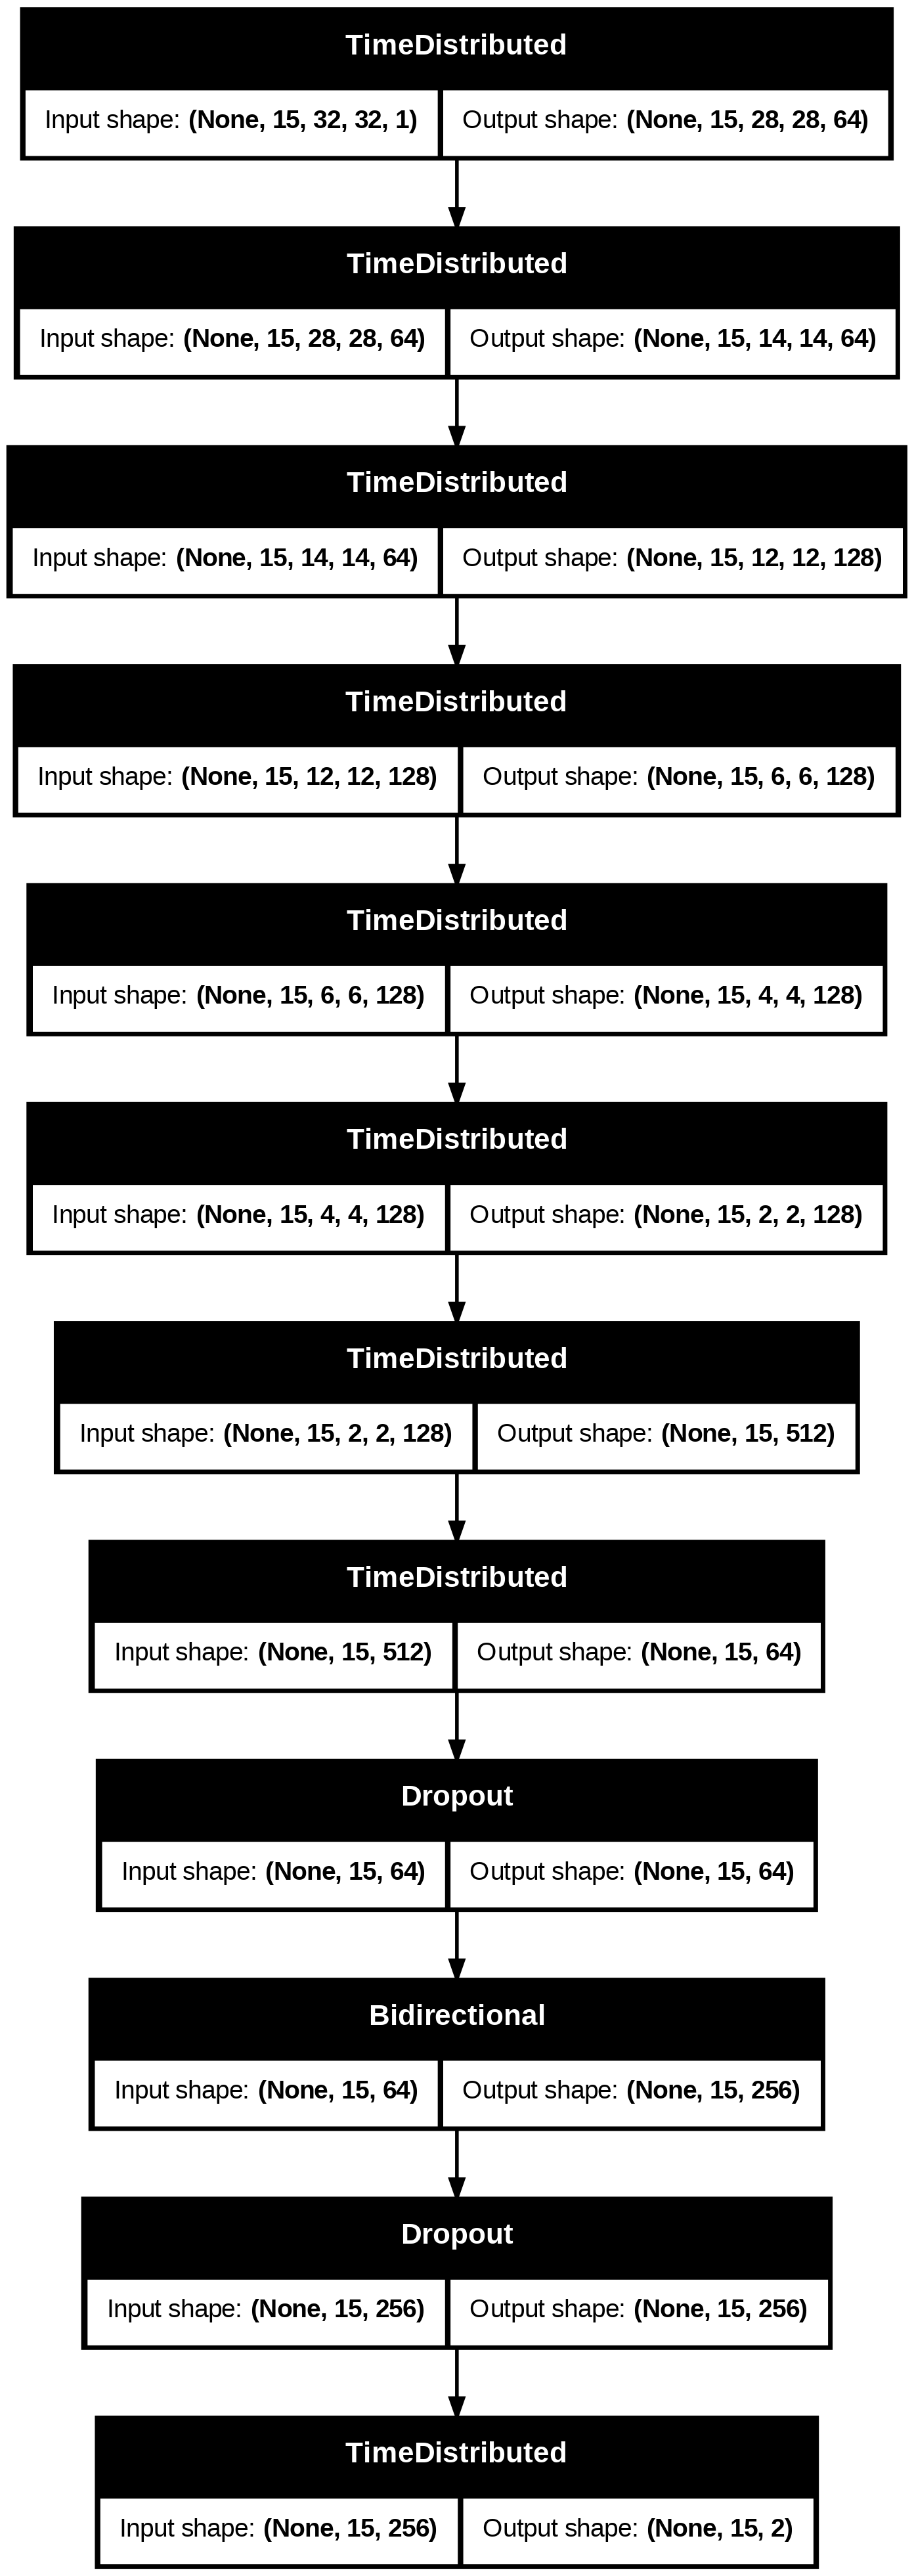

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model, 'model.png', show_shapes=True)

In [ ]:
epochs = 25
batch_size = 32
callbacks = None

history = model.fit(
    X_train_reshaped, y_train_reshaped,
    validation_data=(X_test_reshaped, y_test_reshaped),
    epochs=epochs, batch_size=batch_size, callbacks=callbacks)

Epoch 1/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 64s 5s/step - accuracy: 0.9332 - loss: 0.1636 - val_accuracy: 0.8990 - val_loss: 0.2617
Epoch 2/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 80s 4s/step - accuracy: 0.9341 - loss: 0.1579 - val_accuracy: 0.8955 - val_loss: 0.2506
Epoch 3/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 78s 4s/step - accuracy: 0.9362 - loss: 0.1444 - val_accuracy: 0.8824 - val_loss: 0.2821
Epoch 4/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9402 - loss: 0.1412 - val_accuracy: 0.8782 - val_loss: 0.2782
Epoch 5/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 82s 4s/step - accuracy: 0.9434 - loss: 0.1391 - val_accuracy: 0.8971 - val_loss: 0.2677
Epoch 6/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.9561 - loss: 0.1115 - val_accuracy: 0.9010 - val_loss: 0.2942
Epoch 7/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 81s 4s/step - accuracy: 0.9529 - loss: 0.1156 - val_accuracy: 0.8997 - val_loss: 0.2742
Epoch 8/25
14/14 ━━━━━━━━━━━━━━━━━━━━ 59s 4s/step - accuracy: 0.9626 - loss: 0.1003 - val_accuracy: 0.9029 - val_loss:

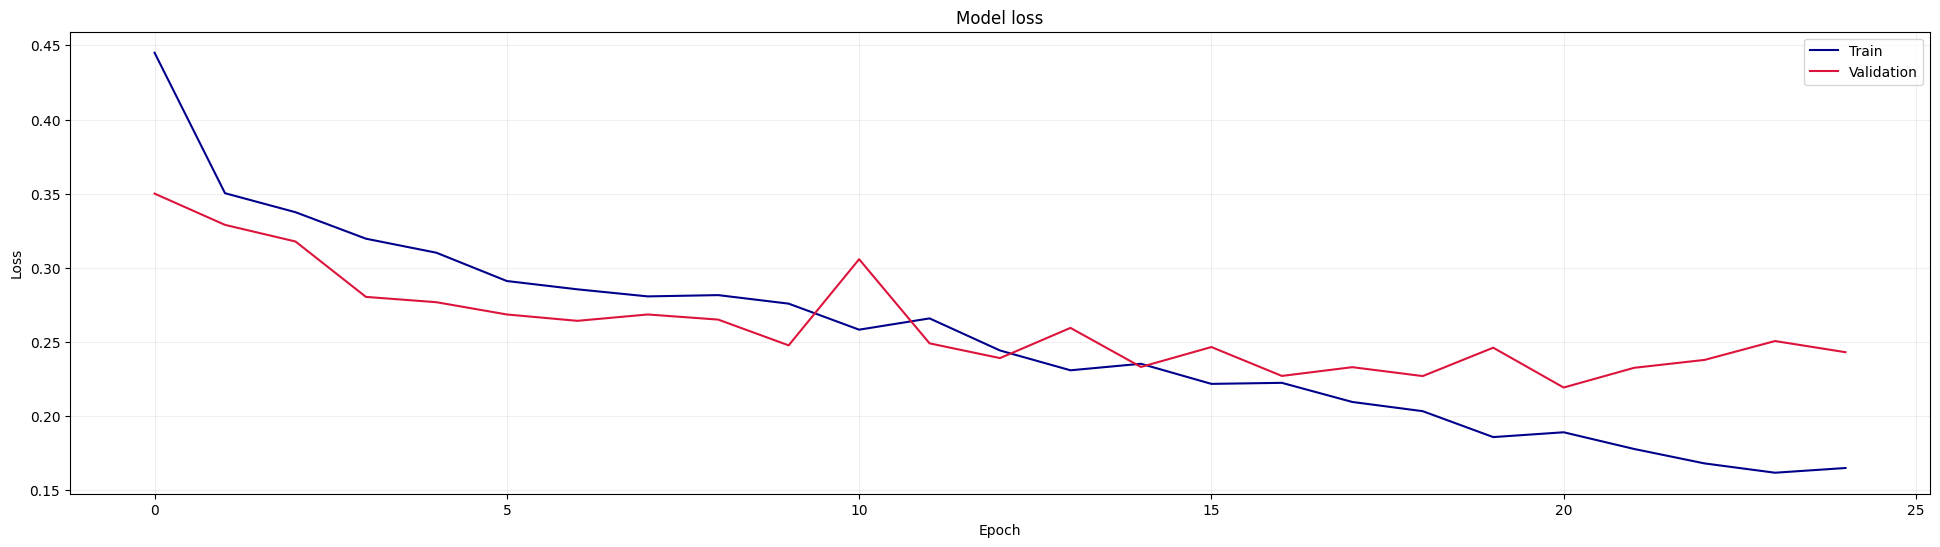

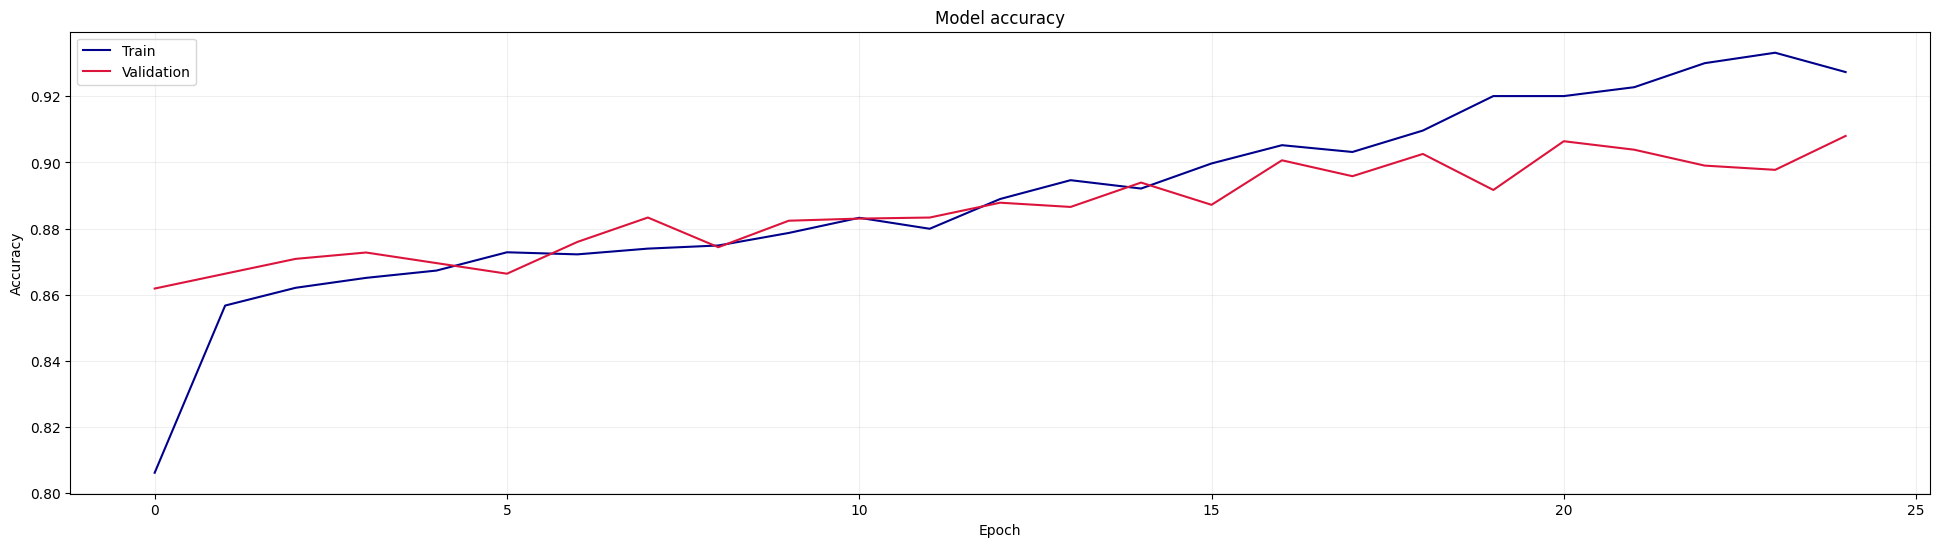

In [ ]:
def plot_loss(history):
    """
    Plots the training and validation loss over epochs.

    Parameters:
        history (keras.callbacks.History): The history object returned by the `fit` method of a Keras model.

    Returns:
        None: Displays the loss plot.
    """
    plt.figure(figsize=(24, 6))
    plt.plot(history.history['loss'], c ="darkblue")
    plt.plot(history.history['val_loss'], c ="crimson")
    plt.legend(["Train", "Validation"])
    plt.title("Model loss")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.grid(True, alpha = 0.2)
    plt.show()


def plot_accuracy(history):
    """
    Plots the training and validation accuracy over epochs.

    Parameters:
        history (keras.callbacks.History): The history object returned by the `fit` method of a Keras model.

    Returns:
        None: Displays the accuracy plot.
    """
    plt.figure(figsize=(24, 6))
    plt.plot(history.history['accuracy'], c ="darkblue")
    plt.plot(history.history['val_accuracy'], c ="crimson")
    plt.legend(["Train", "Validation"])
    plt.title("Model accuracy")
    plt.xlabel("Epoch")
    plt.ylabel("Accuracy")
    plt.grid(True, alpha = 0.2)
    plt.show()


plot_loss(history)
plot_accuracy(history)

####The accuracy for all benchmark datasets

In [ ]:
epoch_25_accuracy = history.history['val_accuracy'][24]

print(f"Accuracy at epoch 25: {epoch_25_accuracy}")


Accuracy at epoch 25: 0.903205156326294


####Validation model

#####Preprocessing input data (extraction features)

In [ ]:
annotation_file = "/content/drive/MyDrive/Annotation/Female/TMIT/SI1022.TextGrid"
audio_file = "/content/drive/MyDrive/Audio/Female/TMIT/SI1022.wav"

dataset_valid = list()

# Load samples:
input_signal, fs = librosa.load(audio_file)

# Load labels:
truth_labels = readLabels(path=annotation_file, sample_rate=fs)

# Extract logfbank features:
features_logfbank_valid = python_speech_features.base.logfbank(signal=input_signal, samplerate=fs, winlen=frame_length, winstep=frame_step, nfilt=num_features,
                                                               nfft=num_nfft, lowfreq=0, highfreq=None, preemph=preemphasis_coef)

# Reshape labels for each group of features:
marker_per_frames_truth = python_speech_features.sigproc.framesig(sig=truth_labels, frame_len=frame_length * fs, frame_step=frame_step * fs,
                                                                 winfunc=np.ones)

# For every frame calc label:
marker_per_frame_truth = np.zeros(marker_per_frames_truth.shape[0])
marker_per_frame_truth = np.array([1 if np.sum(marker_per_frames_truth[j], axis=0) > marker_per_frames_truth.shape[0] / 2 else 0
                                   for j in range(marker_per_frames_truth.shape[0])])

spectrogram_image_valid = np.zeros((n_frames, n_frames))
for j in range(int(np.floor(features_logfbank_valid.shape[0] / n_frames))):
    spectrogram_image_valid = features_logfbank_valid[j * n_frames:(j + 1) * n_frames]
    label_spectrogram_image_valid = 1 if np.sum(marker_per_frame_truth[j * n_frames:(j + 1) * n_frames]) > n_frames / 2 else 0
    dataset_valid.append((label_spectrogram_image_valid, spectrogram_image_valid))

In [ ]:
if stride - len(dataset_valid) > 0:
    for i in range(stride - len(dataset_valid)):
        dataset_valid.append((0, np.zeros((n_frames, n_frames))))

In [ ]:
# Split dataset on train and test:
X_valid = list()
y_valid = list()
for i in range(len(dataset_valid)):
    X_valid.append(dataset_valid[i][1])
    y_valid.append(dataset_valid[i][0])

X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

# Reshaping for scaling:
X_valid = X_valid.reshape(X_valid.shape[0], X_valid.shape[1] * X_valid.shape[2])

# Scale data:
X_valid = scaler.transform(X_valid)

# And reshape back:
X_valid = X_valid.reshape(X_valid.shape[0], n_frames, n_frames)

In [ ]:
# Encoding label:
y_truth = y_valid
y_valid = pd.get_dummies(y_valid)
y_valid = np.array(y_valid)

In [ ]:
# Reshape data for convolution layer:
X_valid_reshaped = X_valid[:int(np.floor(X_valid.shape[0] / stride) * stride)]
y_valid_reshaped = y_valid[:int(np.floor(X_valid.shape[0] / stride) * stride)]

X_valid_reshaped = X_valid_reshaped.reshape((int(X_valid_reshaped.shape[0] / stride), stride, n_frames, n_frames, 1))
y_valid_reshaped = y_valid_reshaped.reshape((int(y_valid_reshaped.shape[0] / stride), stride, y_valid[-1].shape[0]))

In [ ]:
prediction = model.predict(X_valid_reshaped)

predicted_label = np.zeros(prediction.shape[1])
predicted_proba = np.zeros(prediction.shape[1])
ind = 0
for i in range(prediction.shape[1]):
    if prediction[0][i][0] >= prediction[0][i][1]:
        predicted_label[ind] = 0
        predicted_proba[ind] = prediction[0][i][0]
    else:
        predicted_label[ind] = 1
        predicted_proba[ind] = prediction[0][i][1]
    ind = ind + 1

predicted_label

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


array([1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.])

In [ ]:
print(predicted_label, y_truth)

[1. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1.] [1 1 1 1 1 1 0 1 0 0 0 0 0 0 0]


In [ ]:
predicted_label_widely = np.zeros(predicted_label.shape[0] * n_frames)
ind_start = 0
ind_stop = n_frames
shift_step = n_frames
for i in range(predicted_label.shape[0]):
    predicted_label_widely[ind_start:ind_stop] = predicted_label[i]
    ind_start = ind_start + shift_step
    ind_stop = ind_stop + shift_step

label_timeseries = np.zeros(input_signal.shape[0])
begin = int(0)
end = int(frame_length * fs)
shift_step = int(frame_step * fs)
for i in range(predicted_label_widely.shape[0]):
    label_timeseries[begin:end] = predicted_label_widely[i]
    begin = begin + shift_step
    end = end + shift_step

#####Plot check result (file test)

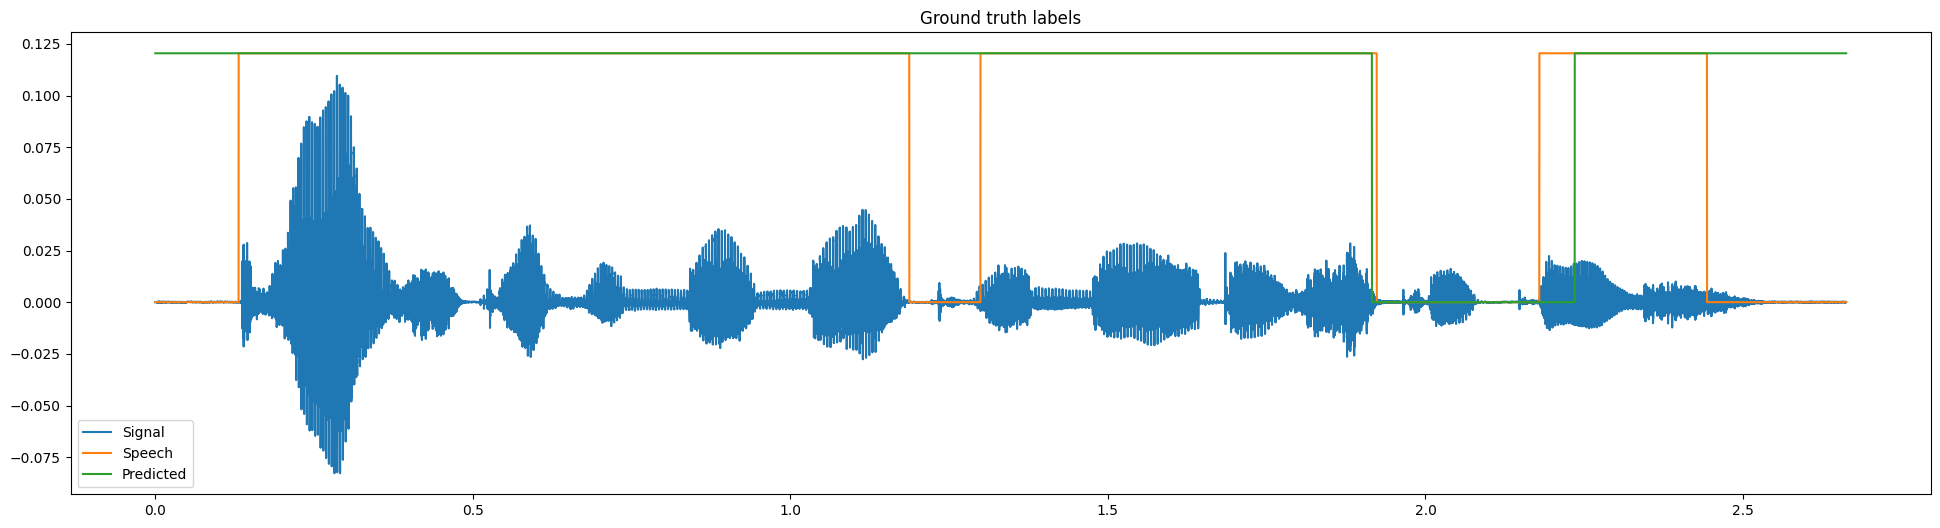

In [ ]:
# define time axis
Ns = len(input_signal)  # number of sample
Ts = 1 / fs  # sampling period
t = np.arange(Ns) * Ts  # time axis in seconds
norm_coef = 1.1 * np.max(input_signal)

edge_ind = np.min([input_signal.shape[0], len(truth_labels)])

plt.figure(figsize=(24, 6))
plt.plot(t[:edge_ind], input_signal[:edge_ind])
plt.plot(t[:edge_ind], np.array(truth_labels[:edge_ind]) * norm_coef)
plt.plot(t[:edge_ind], label_timeseries[:edge_ind] * norm_coef)

plt.title("Ground truth labels")
plt.legend(['Signal', 'Speech', 'Predicted'])
plt.show()